In [47]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_list = os.listdir("./train_data/training_images")
figure_dir = "./Astro128Lab3/figures/"

In [2]:
l = ["./train_data/training_images/" + i for i in file_list if "_" not in i]
l = np.array(l)

In [3]:
l

array(['./train_data/training_images/873932.jpg',
       './train_data/training_images/523554.jpg',
       './train_data/training_images/139923.jpg', ...,
       './train_data/training_images/146136.jpg',
       './train_data/training_images/420736.jpg',
       './train_data/training_images/252845.jpg'], dtype='<U39')

In [4]:
import PIL
from PIL import Image

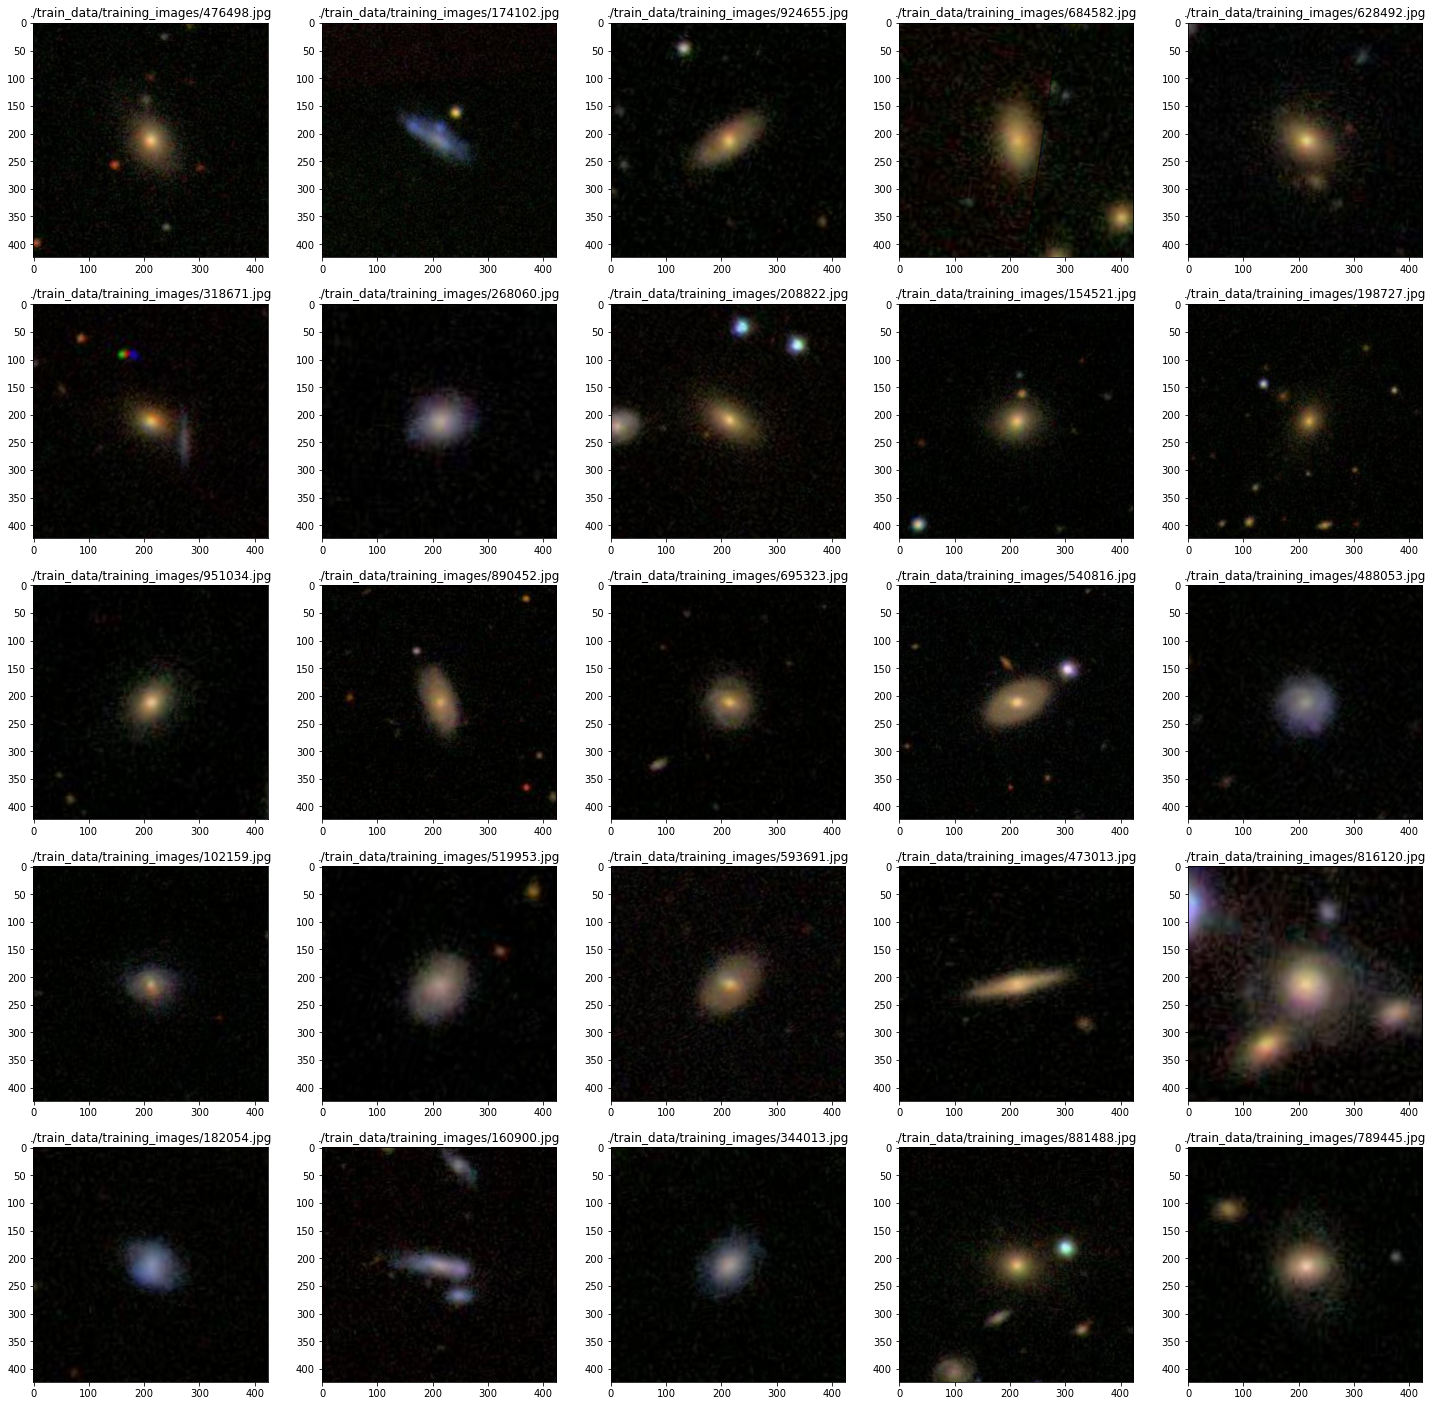

In [5]:
rand_idx = np.random.randint(len(l), size = 25)
fig, ax = plt.subplots(5, 5, figsize = (25, 25))

for i in range(25):
    image = np.array(Image.open(l[rand_idx][i]))
    ax_i = ax[i // 5, i % 5]
    ax_i.imshow(image)
    ax_i.set_title(l[rand_idx][i])

In [5]:
train_label_def = pd.read_csv("training_classifications.csv")

In [6]:
orig_cols = train_label_def.columns

In [7]:
cl_names = ["GalaxyID", "Smooth", "Features/Disk", "Star/Artifact", "Edge-On Disk", "Not Edge-On Disk",
            "Bar", "No Bar", "Spiral Arm", "No Spiral Arm", "No Bulge", "Barely Bulge",
            "Obvious Bulge", "Dominant Bulge", "Odd", "Not Odd", "Round", "Between", "Cigar",
            "Ring", "Lens/Arc", "Disturbed", "Irregular", "Other", "Merger", "Dust Lane", 
            "Rounded Bulge", "Boxy Bulge", "Still No Bulge", "Tight Spiral", "Medium Spiral", "Loose Spiral",
            "One Arm", "Two Arm", "Three Arm", "Four Arm", "More Than 4", "Unsure"]
train_labels = train_label_def
cl_label = [i for i in train_labels.columns if f"Galaxy" not in i]
train_labels.columns = cl_names

In [8]:
train_labels

GalaxyID    Smooth  Features/Disk  Star/Artifact  Edge-On Disk  \
0        100008  0.383147       0.616853       0.000000      0.000000   
1        100023  0.327001       0.663777       0.009222      0.031178   
2        100053  0.765717       0.177352       0.056931      0.000000   
3        100078  0.693377       0.238564       0.068059      0.000000   
4        100090  0.933839       0.000000       0.066161      0.000000   
...         ...       ...            ...            ...           ...   
61573    999948  0.510379       0.489621       0.000000      0.059207   
61574    999950  0.901216       0.098784       0.000000      0.000000   
61575    999958  0.202841       0.777376       0.019783      0.116962   
61576    999964  0.091000       0.909000       0.000000      0.045450   
61577    999967  0.767000       0.140000       0.093000      0.000000   

       Not Edge-On Disk       Bar    No Bar  Spiral Arm  No Spiral Arm  ...  \
0              0.616853  0.038452  0.578401    0.418398       0.198455  ...   
1              0.632599  0.467370  0.165229    0.591328       0.041271  ...   
2              0.177352  0.000000  0.177352    0.000000       0.177352  ...   
3              0.238564  0.109493  0.129071    0.189098       0.049466  ...   
4              0.000000  0.000000  0.000000    0.000000       0.000000  ...   
...                 ...       ...       ...         ...            ...  ...   
61573          0.430414  0.000000  0.430414    0.226257       0.204157  ...   
61574          0.098784  0.000000  0.098784    0.000000       0.098784  ...   
61575          0.660414  0.067245  0.593168    0.140022       0.520391  ...   
61576          0.863550  0.022452  0.841098    0.795330       0.068220  ...   
61577          0.140000  0.000000  0.140000    0.023380       0.116620  ...   

       Still No Bulge  Tight Spiral  Medium Spiral  Loose Spiral   One Arm  \
0            0.000000      0.279952       0.138445      0.000000  0.000000   
1            0.018764      0.000000       0.131378      0.459950  0.000000   
2            0.000000      0.000000       0.000000      0.000000  0.000000   
3            0.000000      0.094549       0.000000      0.094549  0.189098   
4            0.000000      0.000000       0.000000      0.000000  0.000000   
...               ...           ...            ...           ...       ...   
61573        0.000000      0.226257       0.000000      0.000000  0.000000   
61574        0.000000      0.000000       0.000000      0.000000  0.000000   
61575        0.000000      0.000000       0.090673      0.049349  0.000000   
61576        0.000000      0.068398       0.318132      0.408799  0.227464   
61577        0.000000      0.023380       0.000000      0.000000  0.000000   

        Two Arm  Three Arm  Four Arm  More Than 4    Unsure  
0      0.092886   0.000000  0.000000          0.0  0.325512  
1      0.591328   0.000000  0.000000          0.0  0.000000  
2      0.000000   0.000000  0.000000          0.0  0.000000  
3      0.000000   0.000000  0.000000          0.0  0.000000  
4      0.000000   0.000000  0.000000          0.0  0.000000  
...         ...        ...       ...          ...       ...  
61573  0.000000   0.000000  0.000000          0.0  0.226257  
61574  0.000000   0.000000  0.000000          0.0  0.000000  
61575  0.067726   0.000000  0.000000          0.0  0.072296  
61576  0.408799   0.090668  0.023065          0.0  0.045334  
61577  0.000000   0.000000  0.000000          0.0  0.023380  

[61578 rows x 38 columns]

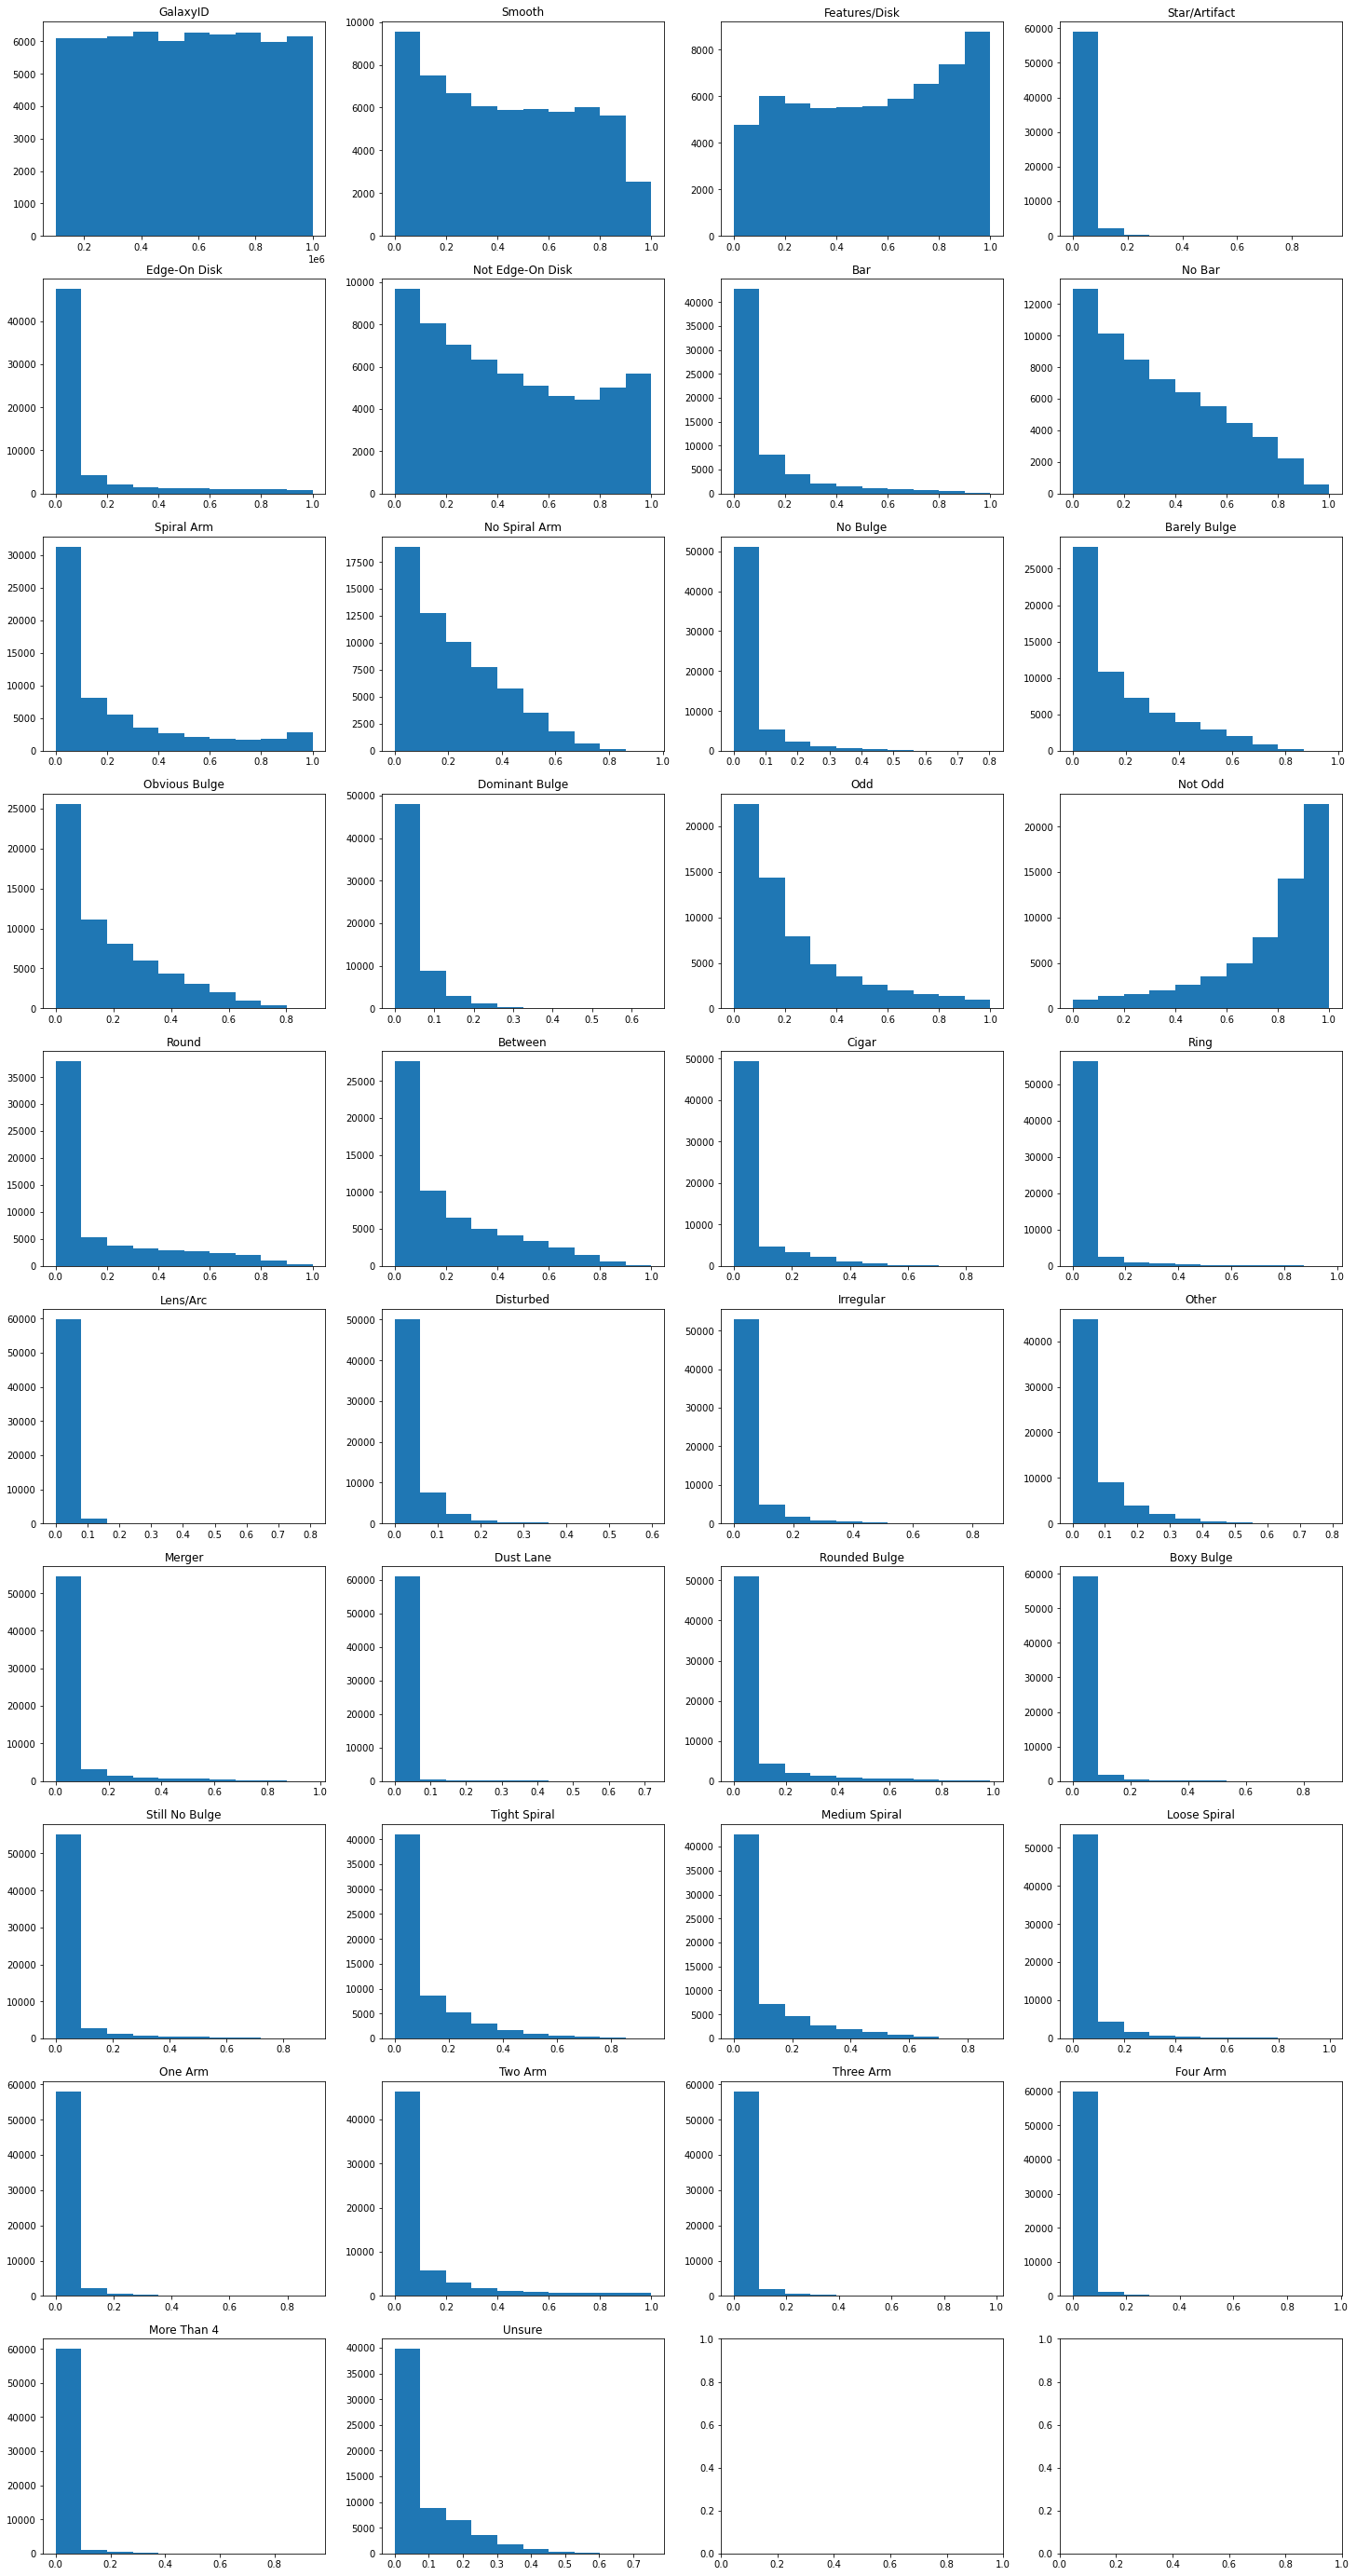

In [11]:
fig, ax = plt.subplots(10, 4, figsize = (25, 50))
for i, label in enumerate(cl_names):
    ax_i = ax[i // 4, i % 4]
    ax_i.hist(train_labels[label])
    ax_i.set_title(label)
plt.savefig(figure_dir + "all_hist.png", bbox_inches = 'tight')

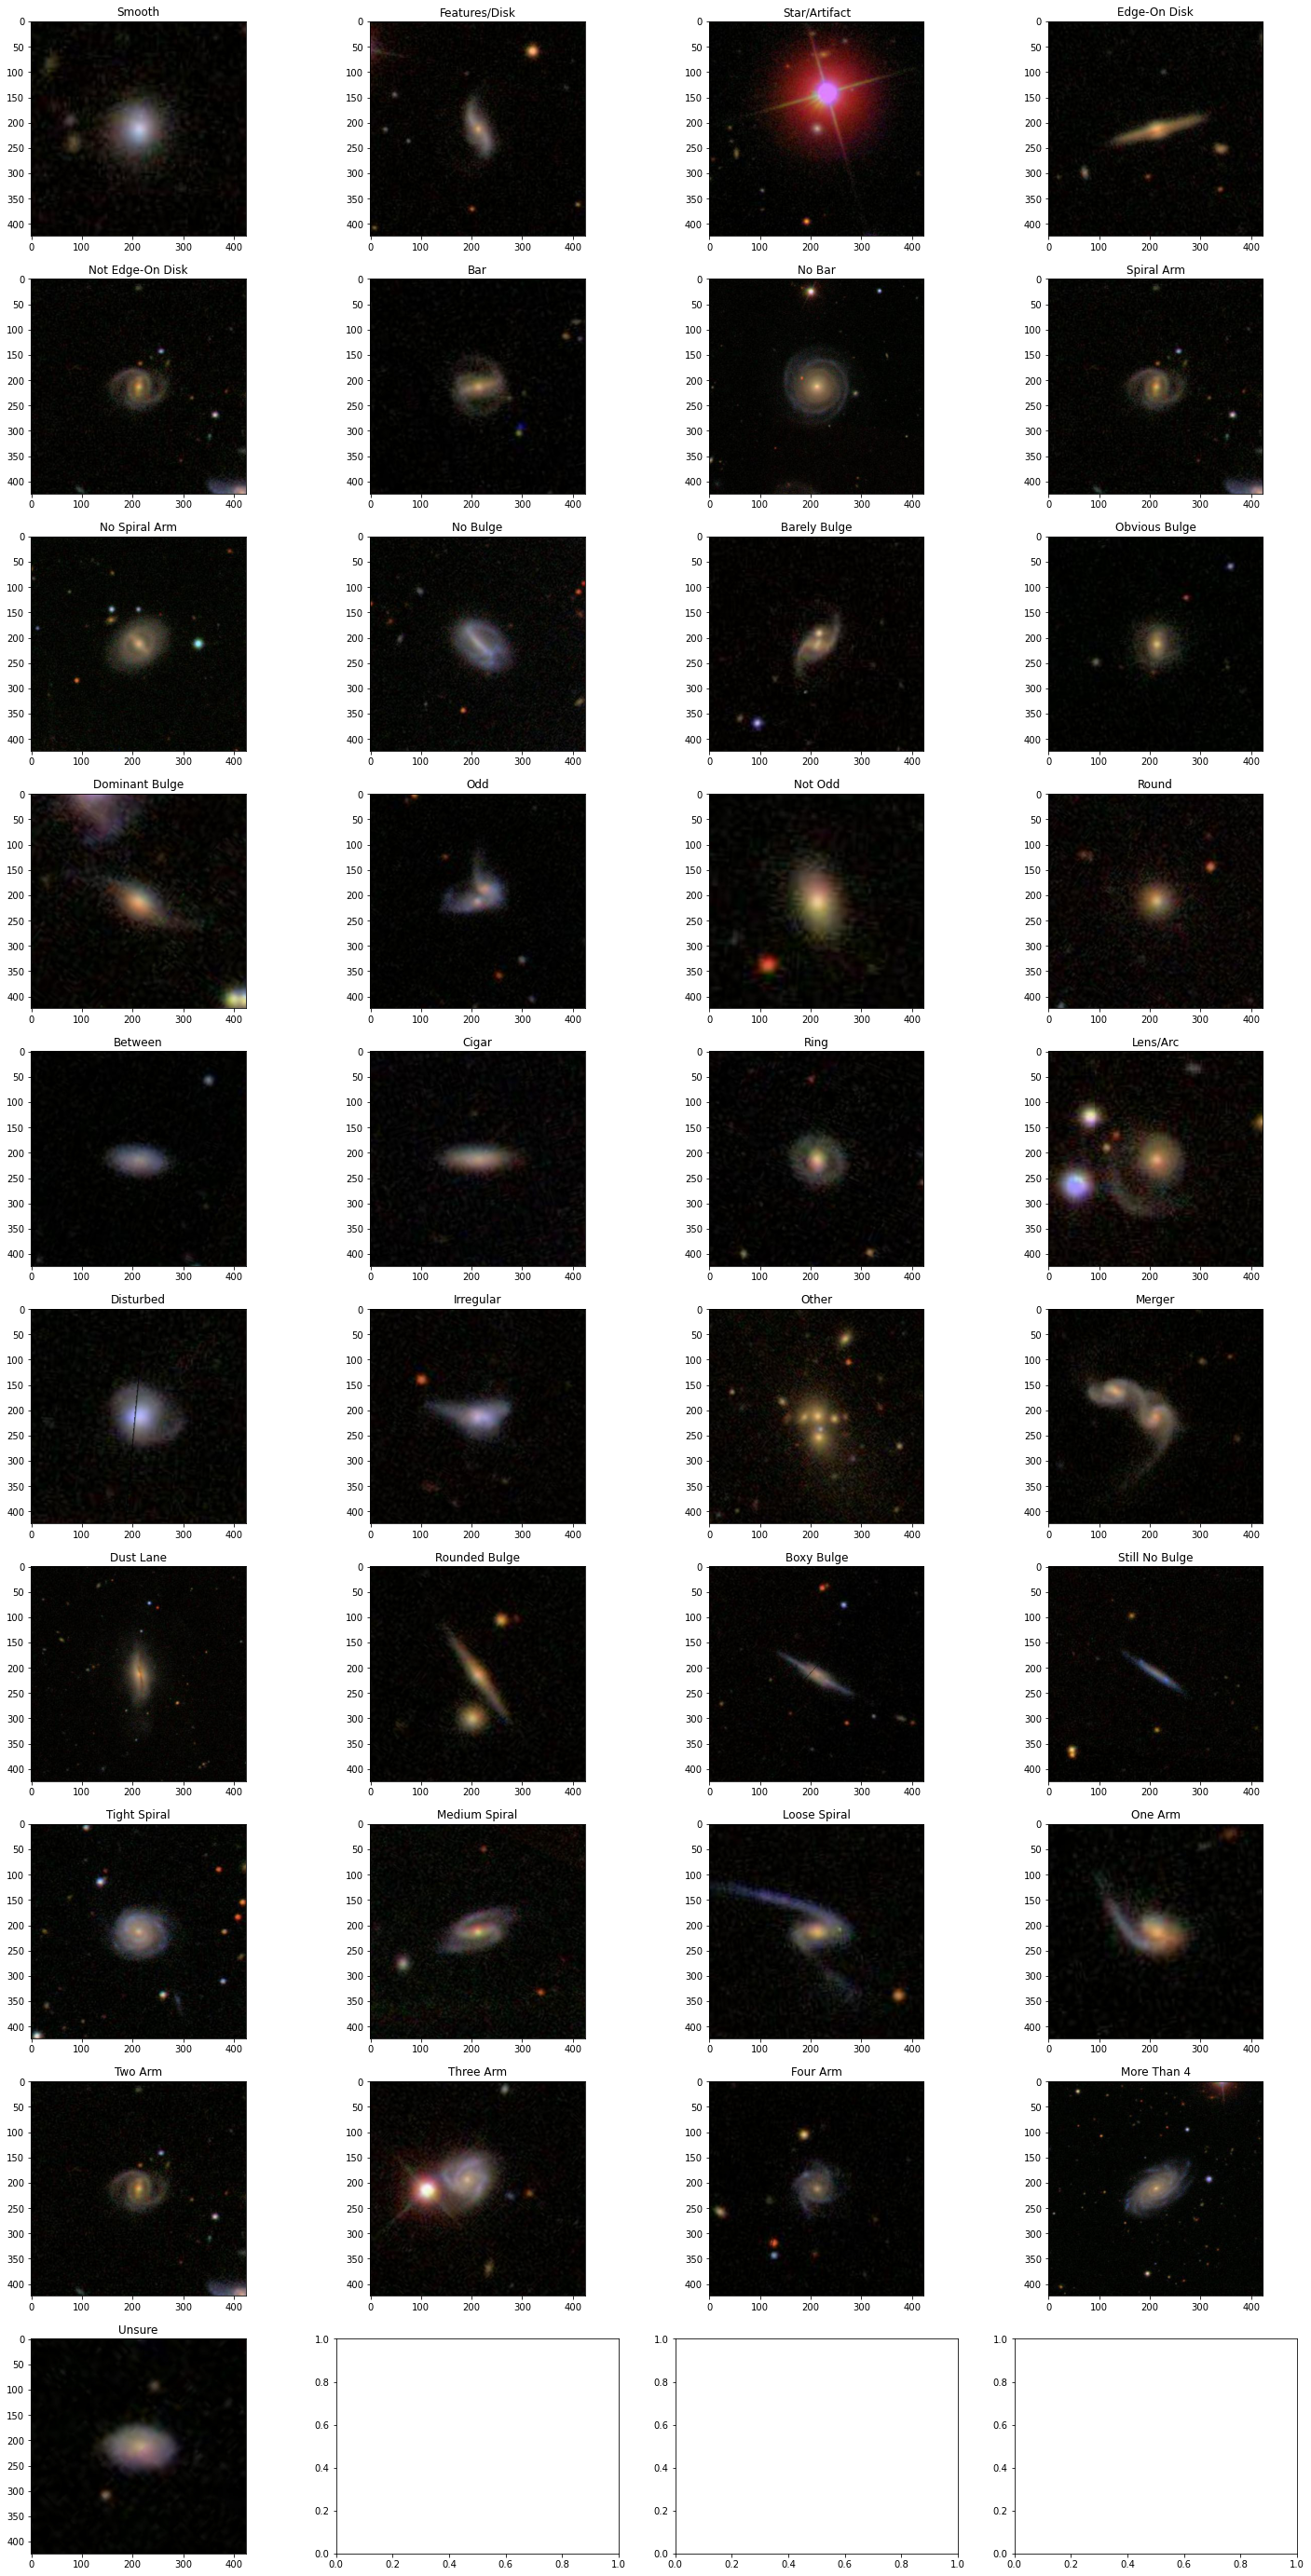

In [12]:
fig, ax = plt.subplots(10, 4, figsize = (25, 50))
for i, label in enumerate(cl_names[1:]):
    ax_i = ax[i // 4, i % 4]
    data = train_labels[["GalaxyID"] + [label]]
    example_data = data[data[label] == data[label].max()].iloc[0]
    path = "./train_data/training_images/" + str(int(example_data["GalaxyID"])) + ".jpg"
    image = np.array(Image.open(path))
    ax_i.imshow(image)
    ax_i.set_title(label)
plt.savefig(figure_dir + "all_examples.png", bbox_inches = 'tight')

In [12]:
data = train_labels

In [13]:
str(int((data[data["Smooth"] == data["Smooth"].max()].iloc[0])["GalaxyID"]))

'105447'

In [10]:
import seaborn as sns

In [11]:
cl_names

['GalaxyID',
 'Smooth',
 'Features/Disk',
 'Star/Artifact',
 'Edge-On Disk',
 'Not Edge-On Disk',
 'Bar',
 'No Bar',
 'Spiral Arm',
 'No Spiral Arm',
 'No Bulge',
 'Barely Bulge',
 'Obvious Bulge',
 'Dominant Bulge',
 'Odd',
 'Not Odd',
 'Round',
 'Between',
 'Cigar',
 'Ring',
 'Lens/Arc',
 'Disturbed',
 'Irregular',
 'Other',
 'Merger',
 'Dust Lane',
 'Rounded Bulge',
 'Boxy Bulge',
 'Still No Bulge',
 'Tight Spiral',
 'Medium Spiral',
 'Loose Spiral',
 'One Arm',
 'Two Arm',
 'Three Arm',
 'Four Arm',
 'More Than 4',
 'Unsure']

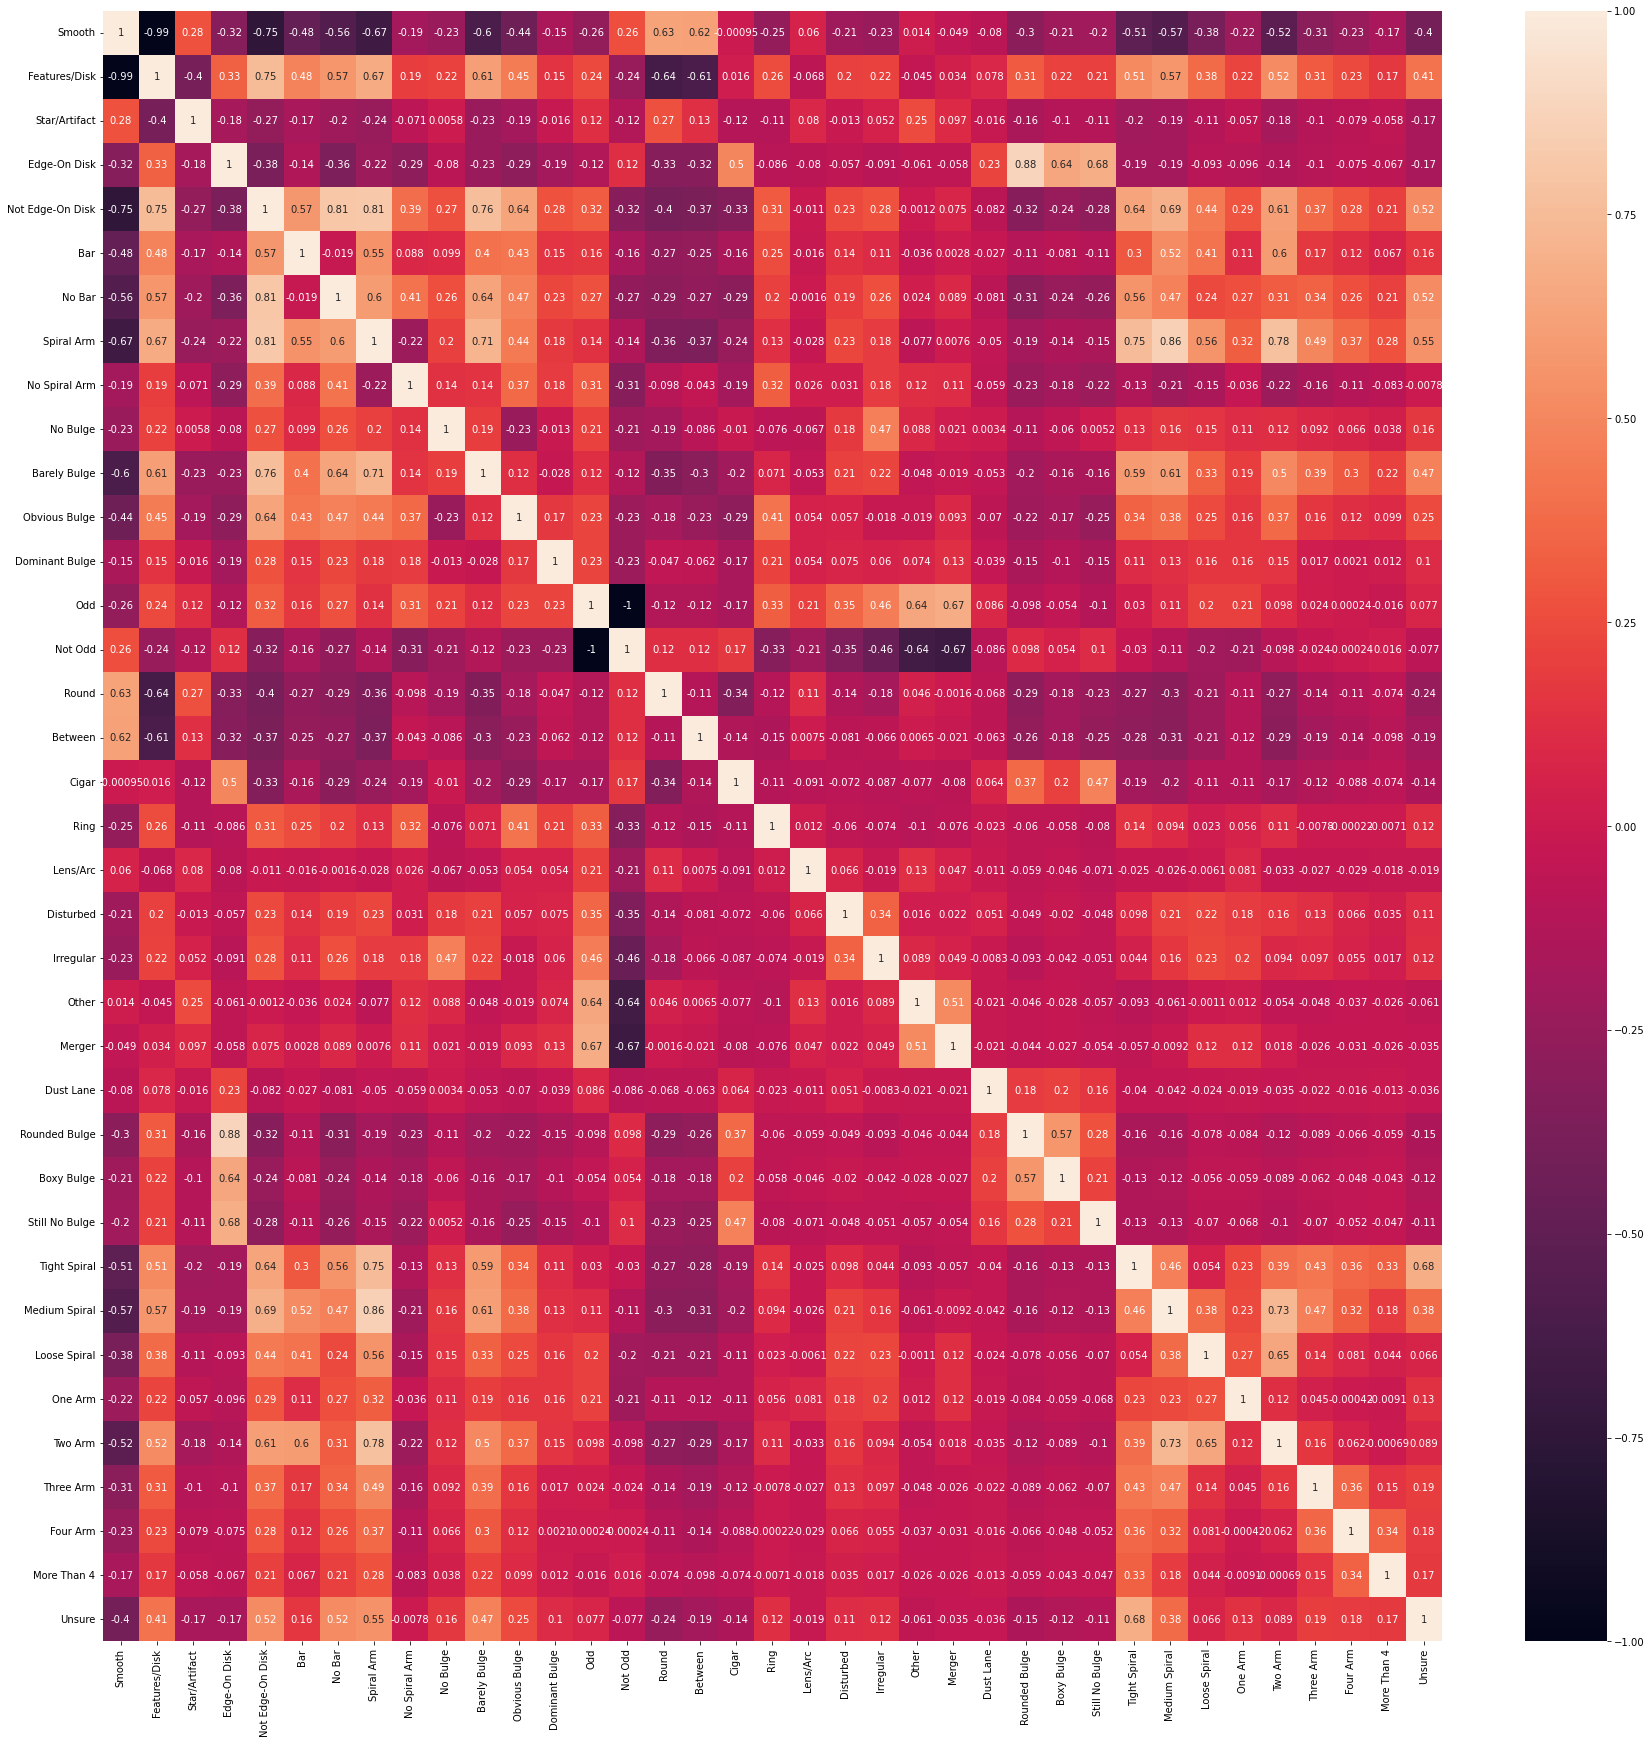

In [22]:
fig = plt.figure(figsize = (30, 30))
sns.heatmap(
        train_labels[cl_names[1:]].corr(),
        annot = True,
    )
plt.savefig(figure_dir + "all_corr.png", bbox_inches = 'tight')

In [14]:
conv_dict = {}

for i, j in zip(orig_cols, cl_names):
    conv_dict[i] = j

In [16]:
train_label_def.columns = orig_cols
train_label_def

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
61573  0.430414  0.226257  0.204157  ...  0.000000   0.226257   0.000000   
61574  0.098784  0.000000  0.098784  ...  0.000000   0.000000   0.000000   
61575  0.593168  0.140022  0.520391  ...  0.000000   0.000000   0.090673   
61576  0.841098  0.795330  0.068220  ...  0.000000   0.068398   0.318132   
61577  0.140000  0.023380  0.116620  ...  0.000000   0.023380   0.000000   

       Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
0       0.000000   0.000000   0.092886   0.000000   0.000000        0.0   
1       0.459950   0.000000   0.591328   0.000000   0.000000        0.0   
2       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3       0.094549   0.189098   0.000000   0.000000   0.000000        0.0   
4       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
...          ...        ...        ...        ...        ...        ...   
61573   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61574   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61575   0.049349   0.000000   0.067726   0.000000   0.000000        0.0   
61576   0.408799   0.227464   0.408799   0.090668   0.023065        0.0   
61577   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       Class11.6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
61573   0.226257  
61574   0.000000  
61575   0.072296  
61576   0.045334  
61577   0.023380  

[61578 rows x 38 columns]

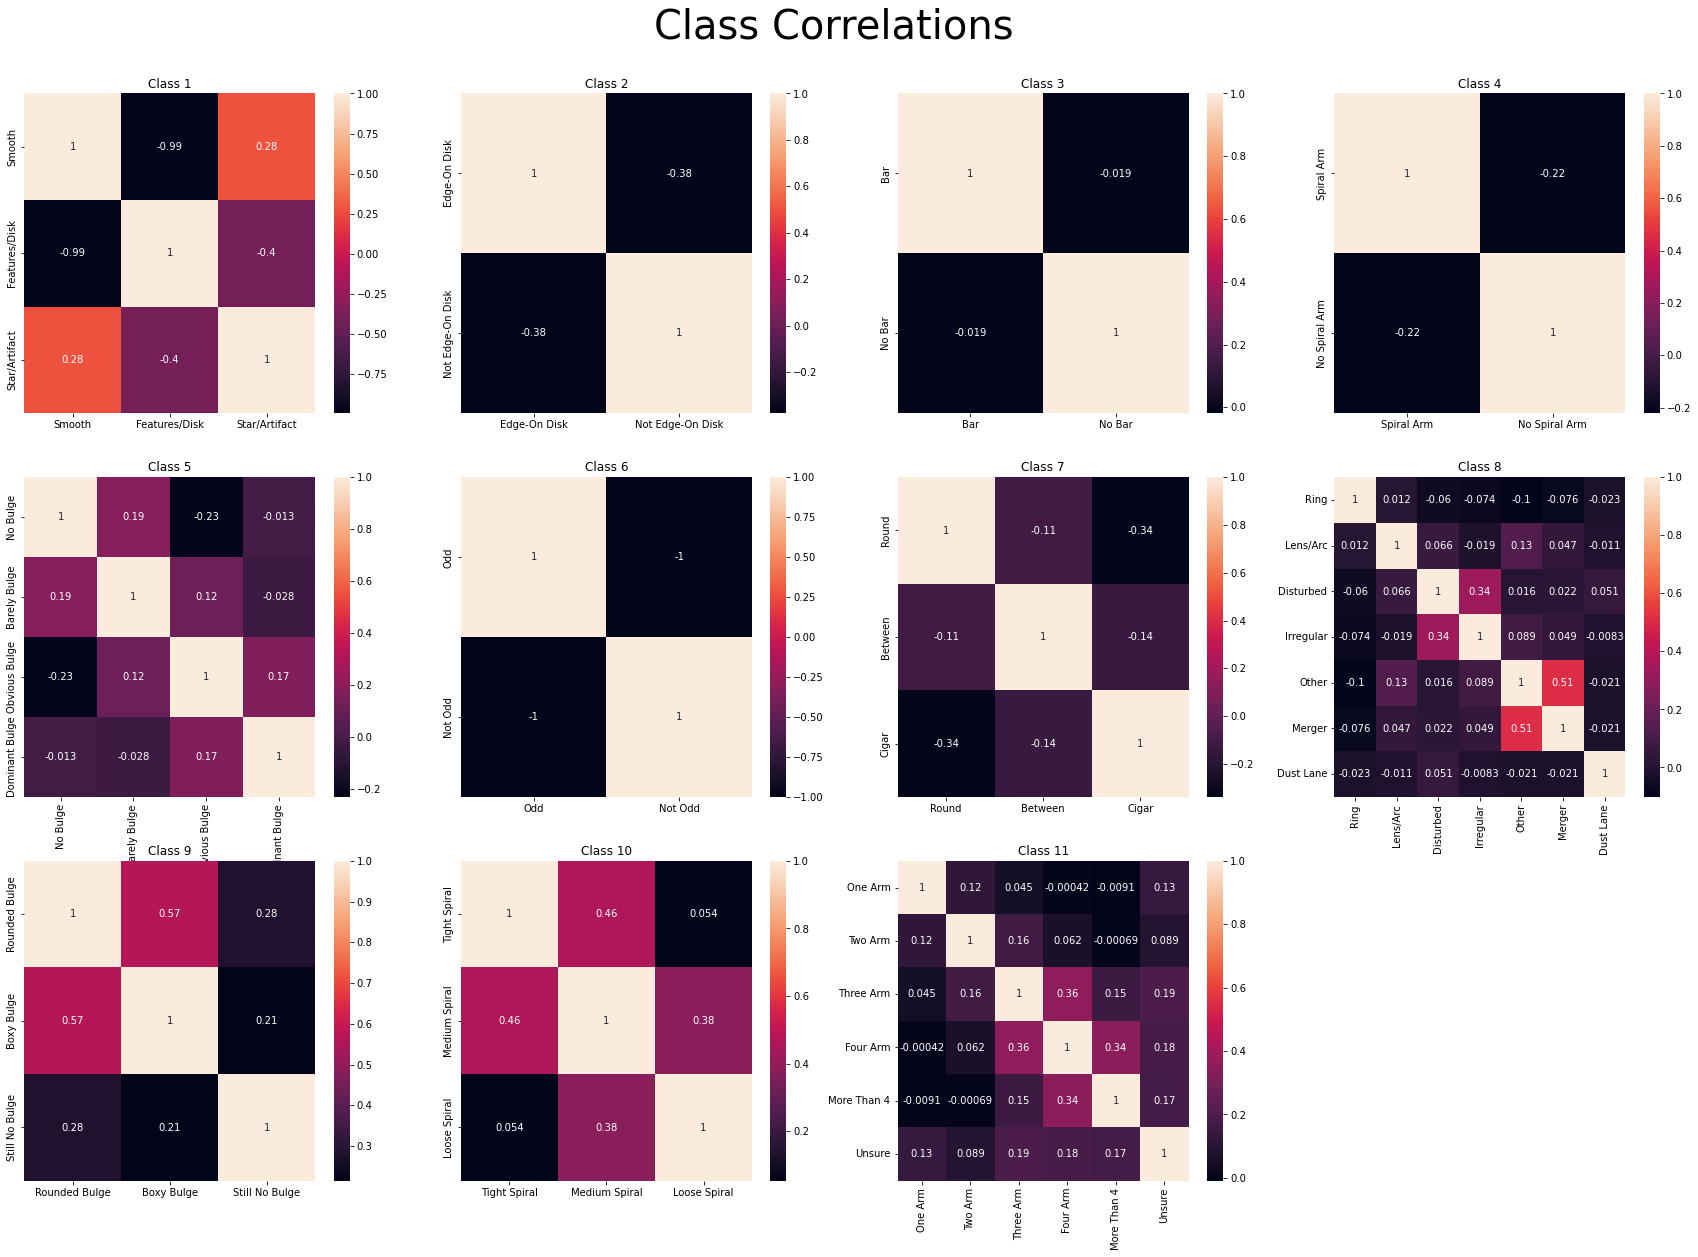

In [20]:
fig, ax = plt.subplots(3, 4, figsize = (30, 20))
for img_pos in range(1, 12):
    img_pos_idx = img_pos - 1
    ax_i = ax[img_pos_idx // 4, img_pos_idx % 4]
    a = train_label_def[[i for i in train_label_def.columns if f"Class{img_pos}." in i]]
    a.columns = [conv_dict[i] for i in a.columns]
    sns.heatmap(
        a.corr(),
        ax = ax_i,
        annot = True,
    )
    ax_i.set_title(f"Class {img_pos}")
fig.suptitle("Class Correlations", y = 0.94, fontsize = 40)
fig.delaxes(ax[2][3])
plt.savefig(figure_dir + "class_corr.png", bbox_inches = 'tight')

In [25]:
70 * 70 * 3 * 32 / 8 / 1024 / 1024 

0.0560760498046875

In [23]:
424 * 424 * 3 * 65000 * 64 / 8 / 1024 / 1024 / 1024

261.18993759155273

In [18]:
i = np.random.randint(0, 3000)
image = Image.open(l[i])

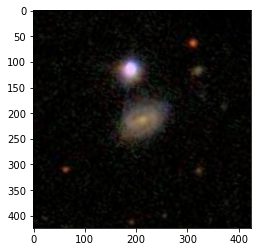

In [19]:
plt.imshow(image)

In [20]:
np.array(image).shape

(424, 424, 3)

In [21]:
from PIL import Image, ImageOps

cropped = ImageOps.crop(image, 120)
resized = cropped.resize((70, 70))

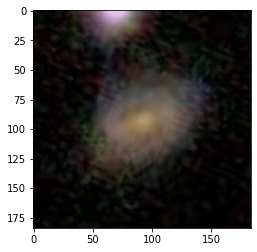

In [22]:
plt.imshow(cropped)

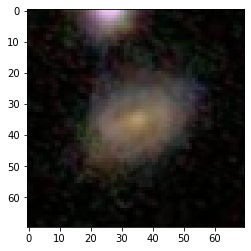

In [23]:
plt.imshow(resized)

In [192]:
resized.save('train_data/lol.jpg')

In [27]:
crop_paths = []
for i in range(len(l)):
    crop_paths.append(l[i].replace("training_images", "cropped_images"))
crop_paths = np.array(crop_paths)

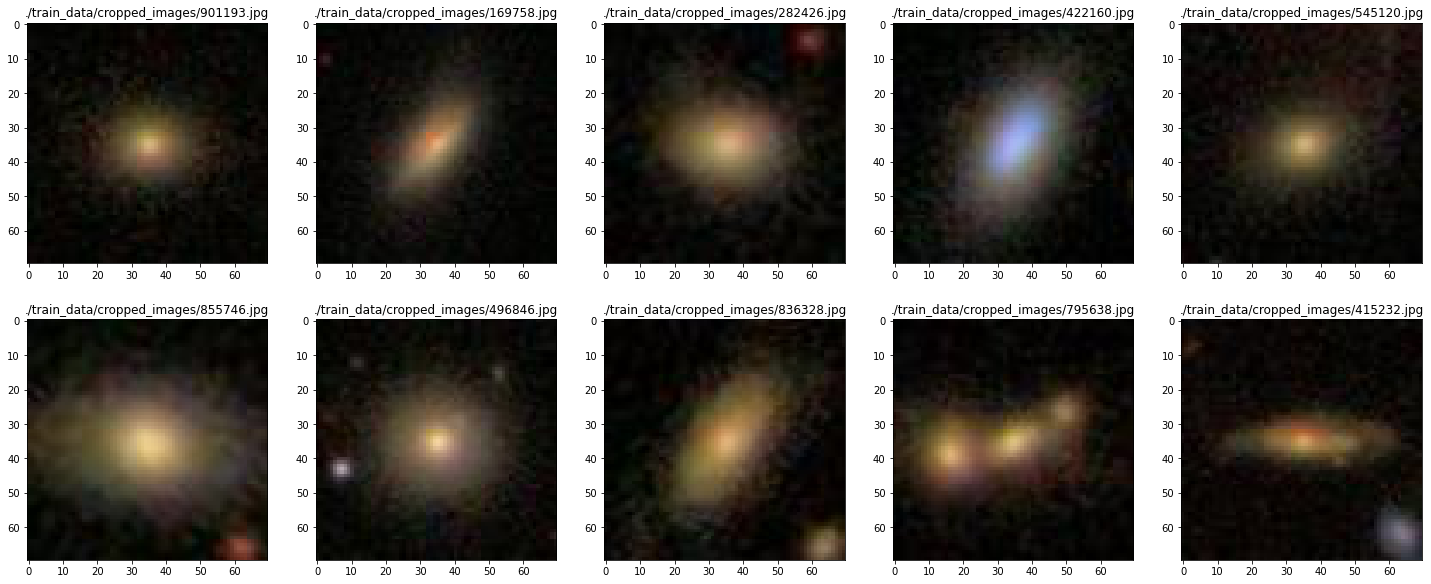

In [33]:
rand_idx = np.random.randint(len(crop_paths), size = 25)
fig, ax = plt.subplots(2, 5, figsize = (25, 10))

for i in range(10):
    image = np.array(Image.open(crop_paths[rand_idx][i]))
    ax_i = ax[i // 5, i % 5]
    ax_i.imshow(image)
    ax_i.set_title(crop_paths[rand_idx][i])
plt.savefig(figure_dir + "crop_examples.png", bbox_inches = 'tight')

In [44]:
image.shape

(70, 70, 3)

In [83]:
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.layers.core import Activation
from keras.callbacks import ModelCheckpoint, CSVLogger
import tensorflow as tf

import pandas as pd
import numpy as np
import PIL
from PIL import Image
import os
import matplotlib.pylab as plt
%matplotlib inline

In [69]:
cl_names = ["GalaxyID", "Smooth", "Features/Disk", "Star/Artifact", "Edge-On Disk", "Not Edge-On Disk",
            "Bar", "No Bar", "Spiral Arm", "No Spiral Arm", "No Bulge", "Barely Bulge",
            "Obvious Bulge", "Dominant Bulge", "Odd", "Not Odd", "Round", "Between", "Cigar",
            "Ring", "Lens/Arc", "Disturbed", "Irregular", "Other", "Merger", "Dust Lane", 
            "Rounded Bulge", "Boxy Bulge", "Still No Bulge", "Tight Spiral", "Medium Spiral", "Loose Spiral",
            "One Arm", "Two Arm", "Three Arm", "Four Arm", "More Than 4", "Unsure"]

In [70]:
file_list = os.listdir("./train_data/training_images")
figure_dir = "./Astro128Lab3/figures/"
l = ["./train_data/training_images/" + i for i in file_list if "_" not in i]
l = np.array(l)
crop_paths = []
for i in range(len(l)):
    crop_paths.append(l[i].replace("training_images", "cropped_images"))
crop_paths = np.array(crop_paths)

In [71]:
np.random.seed(76)
train_labels = pd.read_csv("training_classifications.csv")
train_labels["GalaxyID"] = train_labels.GalaxyID.astype("str") + ".jpg"
rand_galaxies = np.array(train_labels.GalaxyID)
np.random.shuffle(rand_galaxies)
train_galaxies = rand_galaxies[len(crop_paths) // 5:]
test_galaxies = rand_galaxies[:len(crop_paths) // 5]

In [72]:
train_labels_temp = train_labels[:]
train_labels_temp.index = train_labels_temp.GalaxyID
train_labels_temp.columns = cl_names
train_labels_temp = train_labels_temp.drop("GalaxyID", axis = 1)

In [73]:
train_labels_temp.loc[train_galaxies].reset_index(drop = True)

Smooth  Features/Disk  Star/Artifact  Edge-On Disk  Not Edge-On Disk  \
0      0.551159       0.421383       0.027458      0.180773          0.240610   
1      0.007953       0.979745       0.012302      0.000000          0.979745   
2      0.717609       0.260299       0.022092      0.000000          0.260299   
3      0.663285       0.277942       0.058773      0.069486          0.208456   
4      0.621449       0.378551       0.000000      0.000000          0.378551   
...         ...            ...            ...           ...               ...   
49258  0.482479       0.481085       0.036435      0.064981          0.416104   
49259  0.851000       0.130000       0.019000      0.018590          0.111410   
49260  0.198963       0.745786       0.055251      0.000000          0.745786   
49261  0.655583       0.334866       0.009551      0.000000          0.334866   
49262  0.234714       0.759312       0.005974      0.118500          0.640812   

            Bar    No Bar  Spiral Arm  No Spiral Arm  No Bulge  ...  \
0      0.118341  0.122269    0.185264       0.055345  0.000000  ...   
1      0.919865  0.059880    0.935191       0.044554  0.000000  ...   
2      0.000000  0.260299    0.145658       0.114641  0.000000  ...   
3      0.000000  0.208456    0.000000       0.208456  0.000000  ...   
4      0.000000  0.378551    0.000000       0.378551  0.000000  ...   
...         ...       ...         ...            ...       ...  ...   
49258  0.217286  0.198818    0.000000       0.416104  0.000000  ...   
49259  0.000000  0.111410    0.000000       0.111410  0.000000  ...   
49260  0.056413  0.689373    0.304420       0.441366  0.295581  ...   
49261  0.000000  0.334866    0.000000       0.334866  0.000000  ...   
49262  0.000000  0.640812    0.000000       0.640812  0.000000  ...   

       Still No Bulge  Tight Spiral  Medium Spiral  Loose Spiral   One Arm  \
0            0.000000      0.000000       0.000000      0.185264  0.000000   
1            0.000000      0.234926       0.650310      0.049955  0.000000   
2            0.000000      0.000000       0.145658      0.000000  0.000000   
3            0.000000      0.000000       0.000000      0.000000  0.000000   
4            0.000000      0.000000       0.000000      0.000000  0.000000   
...               ...           ...            ...           ...       ...   
49258        0.000000      0.000000       0.000000      0.000000  0.000000   
49259        0.000000      0.000000       0.000000      0.000000  0.000000   
49260        0.000000      0.140105       0.127389      0.036927  0.021543   
49261        0.000000      0.000000       0.000000      0.000000  0.000000   
49262        0.014219      0.000000       0.000000      0.000000  0.000000   

        Two Arm  Three Arm  Four Arm  More Than 4    Unsure  
0      0.185264        0.0       0.0          0.0  0.000000  
1      0.935191        0.0       0.0          0.0  0.000000  
2      0.000000        0.0       0.0          0.0  0.145658  
3      0.000000        0.0       0.0          0.0  0.000000  
4      0.000000        0.0       0.0          0.0  0.000000  
...         ...        ...       ...          ...       ...  
49258  0.000000        0.0       0.0          0.0  0.000000  
49259  0.000000        0.0       0.0          0.0  0.000000  
49260  0.077859        0.0       0.0          0.0  0.205018  
49261  0.000000        0.0       0.0          0.0  0.000000  
49262  0.000000        0.0       0.0          0.0  0.000000  

[49263 rows x 37 columns]

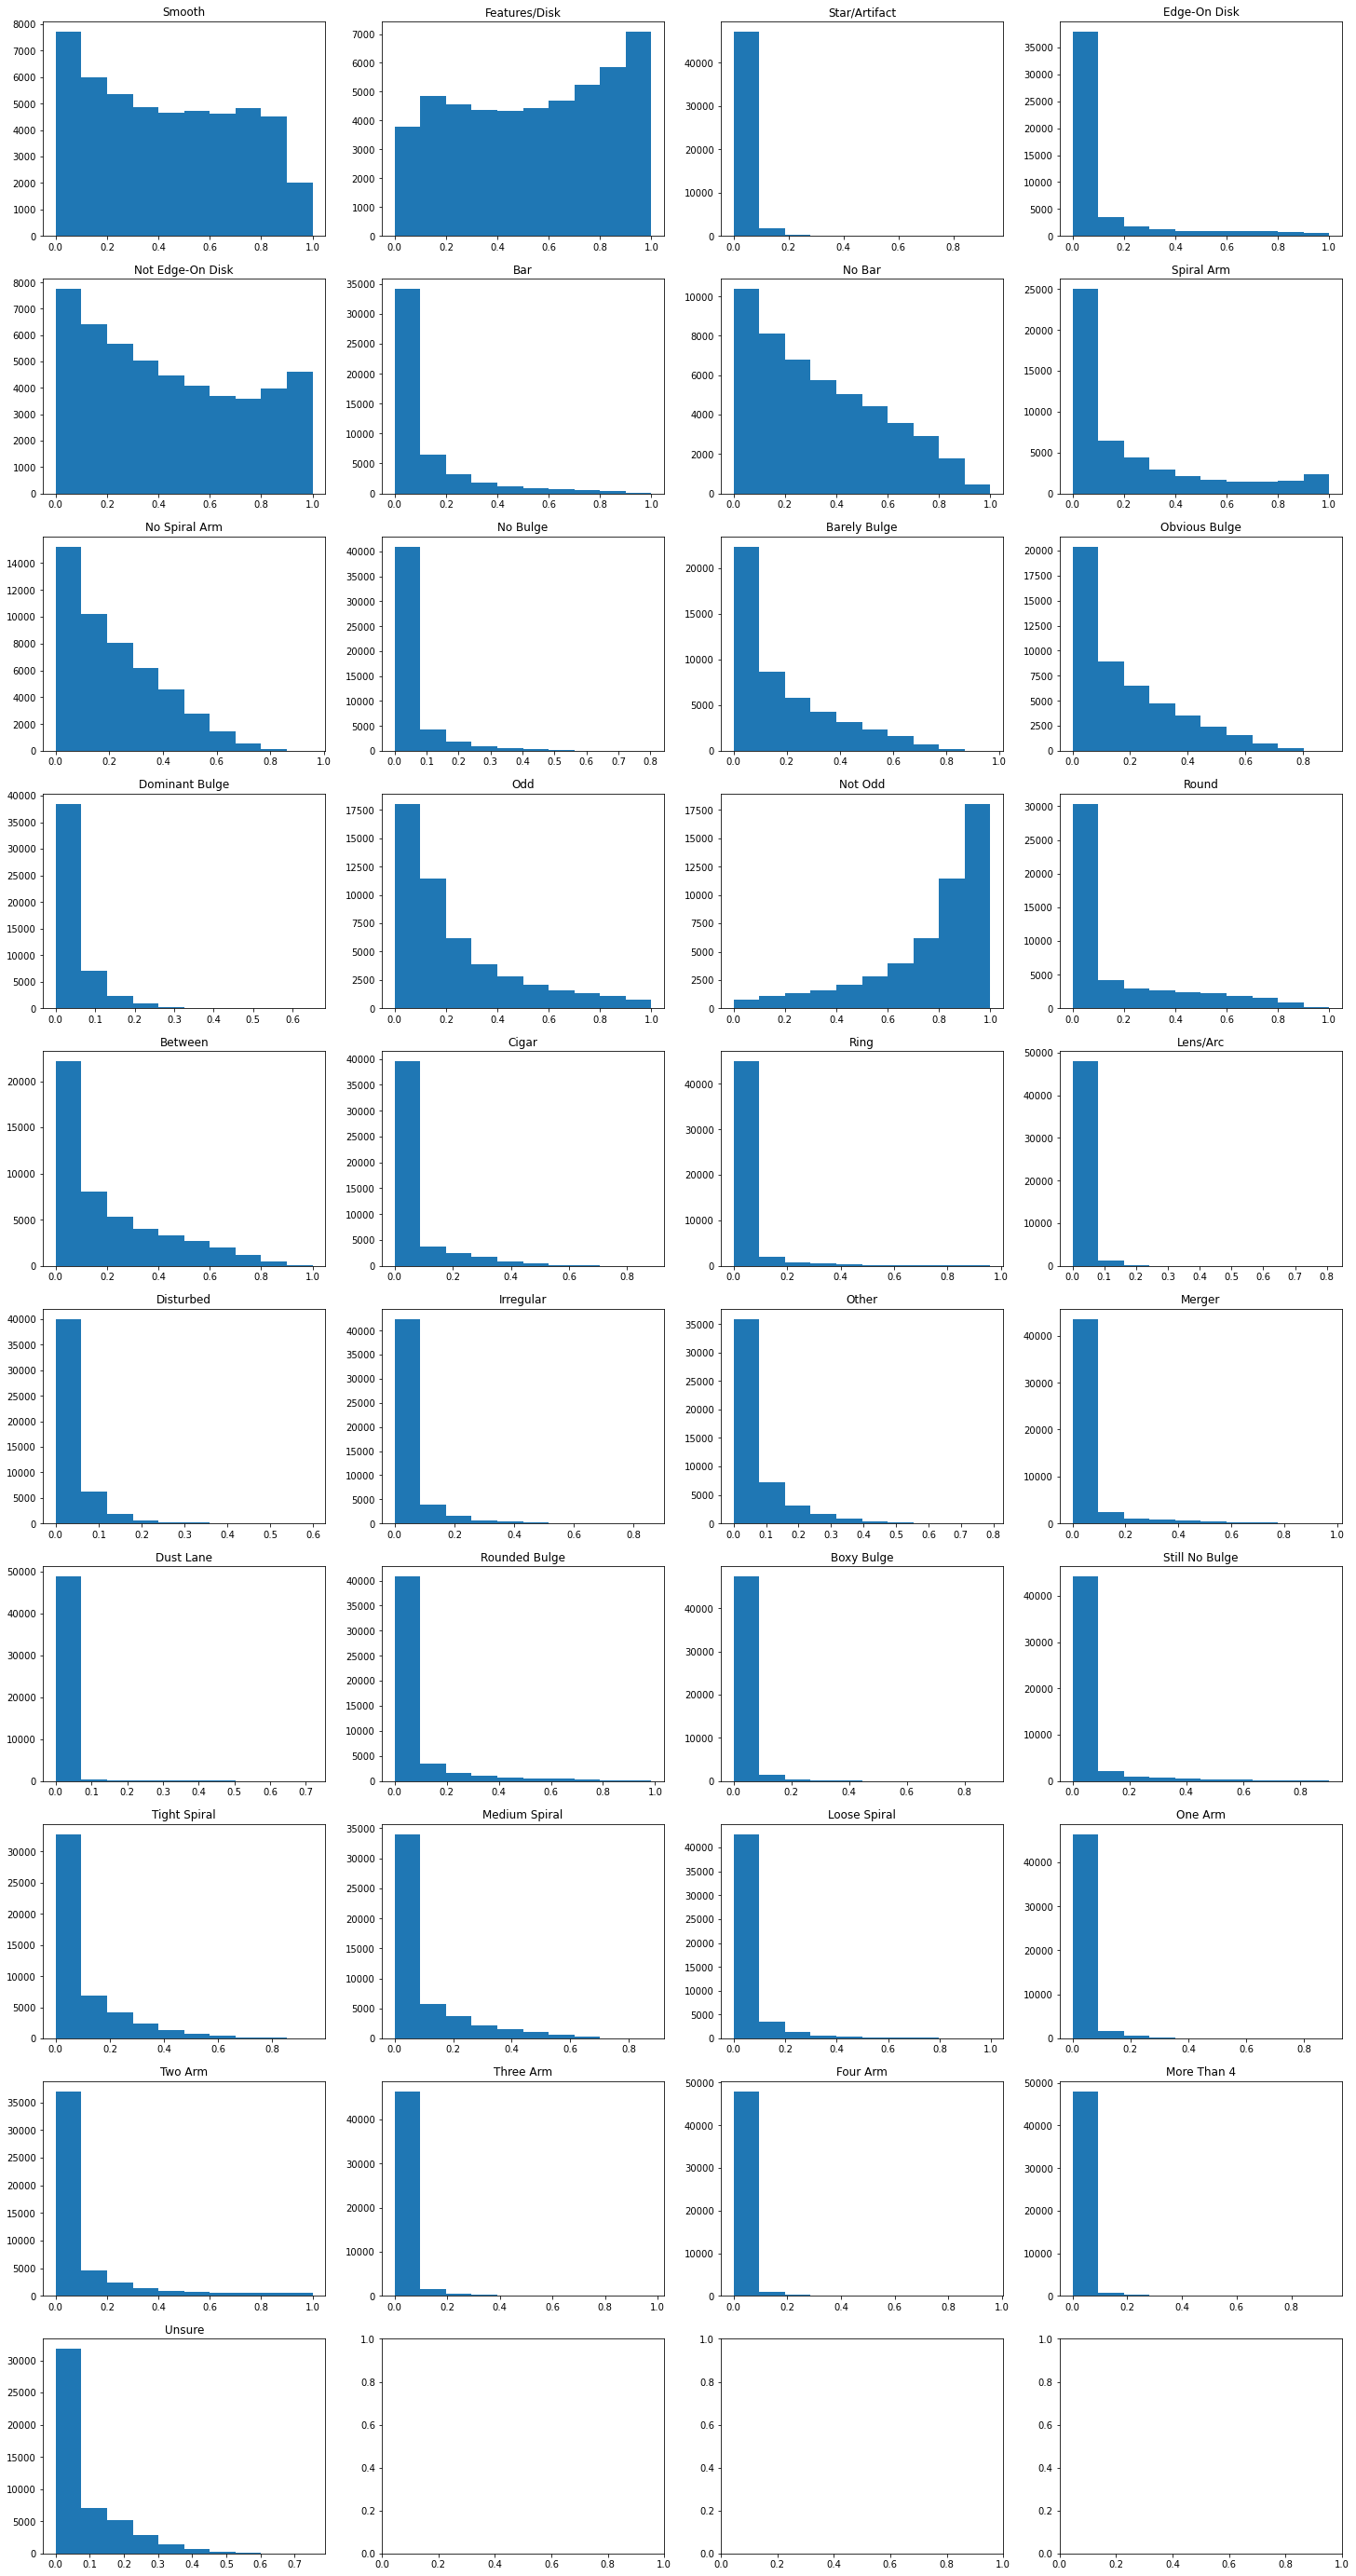

In [7]:
fig, ax = plt.subplots(10, 4, figsize = (25, 50))
for i, label in enumerate(cl_names[1:]):
    ax_i = ax[i // 4, i % 4]
    ax_i.hist(train_labels_temp.loc[train_galaxies][label].reset_index(drop = True))
    ax_i.set_title(label)

In [8]:
fig, ax = plt.subplots(10, 4, figsize = (25, 50))
for i, label in enumerate(cl_names[1:]):
    ax_i = ax[i // 4, i % 4]
    ax_i.hist(train_labels_temp.loc[test_galaxies][label].reset_index(drop = True))
    ax_i.set_title(label)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7ff0682c7700> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff0682c7550> (for post_execute):


KeyboardInterrupt: 

In [74]:
epsilon = 1e-12 # small constant to prevent division by 0

def rescale_outputs(outputs):
    """
    normalise the answer groups for each question. That is 
    """
    
    question_slices = [slice(0, 3), slice(3, 5), slice(5, 7), slice(7, 9), slice(9, 13), slice(13, 15),
                                    slice(15, 18), slice(18, 25), slice(25, 28), slice(28, 31), slice(31, 37)]

    normalisation_mask = np.zeros((37, 37), dtype = "float32")
    for s in question_slices:
        normalisation_mask[s, s] = 1.0

    normalisation_denoms = tf.matmul(outputs, tf.convert_to_tensor(normalisation_mask)) + epsilon 
    output_normalized = outputs / normalisation_denoms
    
    c = lambda i: output_normalized[:, i]
    
    one = tf.divide(c(1), c(1))
    
    reweight_tensor = tf.stack([one, one, one,
                                c(1), c(1),
                                c(4), c(4), 
                                c(4), c(4),
                                c(4), c(4), c(4), c(4),
                                one, one,
                                c(0), c(0), c(0),
                                c(13), c(13), c(13), c(13), c(13), c(13), c(13),
                                c(3), c(3), c(3),
                                c(7), c(7), c(7),
                                c(7), c(7), c(7), c(7), c(7), c(7),
                               ], axis = 1)
    
    return tf.math.multiply(output_normalized, reweight_tensor)


In [75]:
import keras
import tensorflow

class DataGenerator(tensorflow.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(32,32,32), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            img = Image.open('train_data/cropped_images/' + ID)
            img = img.rotate(np.random.random() * 360)
            img = np.array(img) / 255
            img = tensorflow.image.per_image_standardization(img)
            X[i,] = img

        # Store class
        y = np.array(self.labels.loc[list_IDs_temp])

        return X, y

In [76]:
# Parameters
params = {'dim': (70,70),
          'batch_size': 75,
          'n_classes': 37,
          'n_channels': 3,
          'shuffle': True}

# Datasets
partition = {
    'train': train_galaxies,
    'validation': test_galaxies
}

train_labels_y = train_labels.drop("GalaxyID", axis = 1)
train_labels_y.index = train_labels["GalaxyID"]
labels = train_labels_y

# Generators


training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)


from tensorflow.keras.utils import get_custom_objects
optimizer = Adam()
# Design model
theresnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(70, 70, 3),
)

old_model = tf.keras.models.Sequential()
old_model.add(theresnet)
old_model.add(Flatten())
old_model.add(Dense(37, activation = "sigmoid"))
old_model.add(Activation(rescale_outputs))

get_custom_objects().update({'rescale_outputs': rescale_outputs})

old_model.compile(loss='mse', optimizer=optimizer, metrics = [tf.keras.metrics.RootMeanSquaredError()])

old_conf = old_model.get_config()

In [12]:
from tensorflow.keras.utils import get_custom_objects
get_custom_objects().update({'rescale_outputs': rescale_outputs})

In [14]:
from keras.models import load_model


optimizer = Adam(learning_rate = 1.2500e-04)
model = load_model('best_model_augment-new2.hdf5', compile=False)
model.compile(loss='mse', optimizer=optimizer, metrics = [tf.keras.metrics.RootMeanSquaredError()])

[0.586827   0.349766   0.063407   0.         0.349766   0.
 0.349766   0.         0.349766   0.         0.         0.29701429
 0.05275171 0.118664   0.881336   0.53857985 0.04824715 0.
 0.01311629 0.         0.         0.         0.10554771 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.        ]
['Smooth', 'Features/Disk', 'Star/Artifact', 'Edge-On Disk', 'Not Edge-On Disk', 'Bar', 'No Bar', 'Spiral Arm', 'No Spiral Arm', 'No Bulge', 'Barely Bulge', 'Obvious Bulge', 'Dominant Bulge', 'Odd', 'Not Odd', 'Round', 'Between', 'Cigar', 'Ring', 'Lens/Arc', 'Disturbed', 'Irregular', 'Other', 'Merger', 'Dust Lane', 'Rounded Bulge', 'Boxy Bulge', 'Still No Bulge', 'Tight Spiral', 'Medium Spiral', 'Loose Spiral', 'One Arm', 'Two Arm', 'Three Arm', 'Four Arm', 'More Than 4', 'Unsure']
38


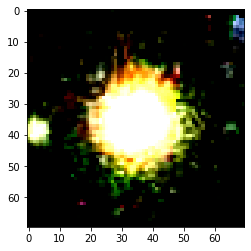

In [15]:
X_example, y_example = training_generator.__getitem__(1)
plt.imshow(X_example[0])
print(y_example[0])
print(cl_names[1:])
print(len(cl_names))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 37)                682021    
                                                                 
 activation (Activation)     (None, 37)                0         
                                                                 
Total params: 24,269,733
Trainable params: 24,216,613
Non-trainable params: 53,120
_________________________________________________________________


In [18]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_root_mean_squared_error', factor = 0.5, patience = 2, min_lr = 1e-6)
checkpoint = ModelCheckpoint("best_model_augment-new3.hdf5", monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='auto', save_freq = "epoch")
csv_logger = CSVLogger('adam_lrp_36epoch_alltrain_augment-new3.log')

In [20]:
# Train model on dataset
history = model.fit(training_generator, steps_per_epoch = 50, validation_data=validation_generator, epochs = 24, 
                    callbacks = [reduce_lr, checkpoint, csv_logger])

Epoch 1/24
50/50 [==============================] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1134
Epoch 00001: val_root_mean_squared_error improved from inf to 0.15525, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 478s 9s/step - loss: 0.0129 - root_mean_squared_error: 0.1134 - val_loss: 0.0241 - val_root_mean_squared_error: 0.1553 - lr: 1.2500e-04
Epoch 2/24
50/50 [==============================] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1147 
Epoch 00002: val_root_mean_squared_error improved from 0.15525 to 0.14757, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 1289s 26s/step - loss: 0.0132 - root_mean_squared_error: 0.1147 - val_loss: 0.0218 - val_root_mean_squared_error: 0.1476 - lr: 1.2500e-04
Epoch 3/24
50/50 [==============================] - ETA: 0s - loss: 0.0129 - root_mean_squared_error: 0.1135
Epoch 00003: val_root_mean_squared_error improved from 0.14757 to 0.13208, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 419s 8s/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - val_loss: 0.0174 - val_root_mean_squared_error: 0.1321 - lr: 1.2500e-04
Epoch 4/24
50/50 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1116
Epoch 00004: val_root_mean_squared_error improved from 0.13208 to 0.12238, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 456s 9s/step - loss: 0.0125 - root_mean_squared_error: 0.1116 - val_loss: 0.0150 - val_root_mean_squared_error: 0.1224 - lr: 1.2500e-04
Epoch 5/24
50/50 [==============================] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1123
Epoch 00005: val_root_mean_squared_error improved from 0.12238 to 0.11691, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 340s 7s/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - val_loss: 0.0137 - val_root_mean_squared_error: 0.1169 - lr: 1.2500e-04
Epoch 6/24
50/50 [==============================] - ETA: 0s - loss: 0.0124 - root_mean_squared_error: 0.1115
Epoch 00006: val_root_mean_squared_error improved from 0.11691 to 0.11630, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 310s 6s/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1163 - lr: 1.2500e-04
Epoch 7/24
50/50 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1118
Epoch 00007: val_root_mean_squared_error did not improve from 0.11630
50/50 [==============================] - 311s 6s/step - loss: 0.0125 - root_mean_squared_error: 0.1118 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1209 - lr: 1.2500e-04
Epoch 8/24
50/50 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1120
Epoch 00008: val_root_mean_squared_error improved from 0.11630 to 0.11309, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 355s 7s/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1131 - lr: 1.2500e-04
Epoch 9/24
50/50 [==============================] - ETA: 0s - loss: 0.0125 - root_mean_squared_error: 0.1117
Epoch 00009: val_root_mean_squared_error improved from 0.11309 to 0.11206, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 311s 6s/step - loss: 0.0125 - root_mean_squared_error: 0.1117 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1121 - lr: 1.2500e-04
Epoch 10/24
50/50 [==============================] - ETA: 0s - loss: 0.0123 - root_mean_squared_error: 0.1109
Epoch 00010: val_root_mean_squared_error improved from 0.11206 to 0.11184, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 312s 6s/step - loss: 0.0123 - root_mean_squared_error: 0.1109 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1118 - lr: 1.2500e-04
Epoch 11/24
50/50 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1104
Epoch 00011: val_root_mean_squared_error improved from 0.11184 to 0.11060, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 384s 8s/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1106 - lr: 1.2500e-04
Epoch 12/24
50/50 [==============================] - ETA: 0s - loss: 0.0126 - root_mean_squared_error: 0.1121
Epoch 00012: val_root_mean_squared_error did not improve from 0.11060
50/50 [==============================] - 339s 7s/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - val_loss: 0.0157 - val_root_mean_squared_error: 0.1255 - lr: 1.2500e-04
Epoch 13/24
50/50 [==============================] - ETA: 0s - loss: 0.0121 - root_mean_squared_error: 0.1102
Epoch 00013: val_root_mean_squared_error did not improve from 0.11060
50/50 [==============================] - 381s 8s/step - loss: 0.0121 - root_mean_squared_error: 0.1102 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112 - lr: 1.2500e-04
Epoch 14/24
50/50 [==============================] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1105

/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 349s 7s/step - loss: 0.0122 - root_mean_squared_error: 0.1105 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1092 - lr: 6.2500e-05
Epoch 15/24
50/50 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1089
Epoch 00015: val_root_mean_squared_error improved from 0.10922 to 0.10850, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 347s 7s/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085 - lr: 6.2500e-05
Epoch 16/24
50/50 [==============================] - ETA: 0s - loss: 0.0120 - root_mean_squared_error: 0.1096
Epoch 00016: val_root_mean_squared_error did not improve from 0.10850
50/50 [==============================] - 370s 7s/step - loss: 0.0120 - root_mean_squared_error: 0.1096 - val_loss: 0.0119 - val_root_mean_squared_error: 0.1089 - lr: 6.2500e-05
Epoch 17/24
50/50 [==============================] - ETA: 0s - loss: 0.0119 - root_mean_squared_error: 0.1092
Epoch 00017: val_root_mean_squared_error improved from 0.10850 to 0.10848, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 314s 6s/step - loss: 0.0119 - root_mean_squared_error: 0.1092 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1085 - lr: 6.2500e-05
Epoch 18/24
50/50 [==============================] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.1080
Epoch 00018: val_root_mean_squared_error improved from 0.10848 to 0.10773, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 339s 7s/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1077 - lr: 3.1250e-05
Epoch 19/24
50/50 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1072
Epoch 00019: val_root_mean_squared_error did not improve from 0.10773
50/50 [==============================] - 349s 7s/step - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0116 - val_root_mean_squared_error: 0.1078 - lr: 3.1250e-05
Epoch 20/24
50/50 [==============================] - ETA: 0s - loss: 0.0118 - root_mean_squared_error: 0.1087
Epoch 00020: val_root_mean_squared_error did not improve from 0.10773
50/50 [==============================] - 351s 7s/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1088 - lr: 3.1250e-05
Epoch 21/24
50/50 [==============================] - ETA: 0s - loss: 0.0117 - root_mean_squared_error: 0.1082

/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 312s 6s/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073 - lr: 1.5625e-05
Epoch 23/24
50/50 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 00023: val_root_mean_squared_error improved from 0.10734 to 0.10710, saving model to best_model_augment-new3.hdf5


/srv/conda/envs/notebook/lib/python3.9/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


50/50 [==============================] - 356s 7s/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1071 - lr: 1.5625e-05
Epoch 24/24
50/50 [==============================] - ETA: 0s - loss: 0.0115 - root_mean_squared_error: 0.1074
Epoch 00024: val_root_mean_squared_error did not improve from 0.10710
50/50 [==============================] - 306s 6s/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1073 - lr: 1.5625e-05


In [ ]:
model.save("adam_lrp_36epoch_alltrain_augment-new3")

2022-12-12 03:52:04.121485: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [ ]:
hist_df = pd.DataFrame(history.history) 

In [ ]:
hist_df

In [ ]:
hist_csv_file = 'sgd_lrp_34epoch_alltrain_history_augment-new3.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [1]:
import pandas as pd

In [4]:
lcurve1 = pd.read_csv('adam_lrp_36epoch_alltrain_augment-new2.log')

In [14]:
lcurve2 = pd.read_csv('adam_lrp_36epoch_alltrain_augment-new3.log')
lcurve2.epoch = lcurve2.epoch + 13

In [17]:
final_curve = pd.concat([lcurve1.loc[:12], lcurve2])

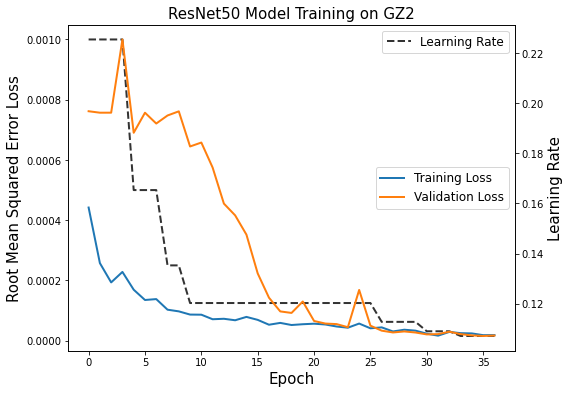

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize = (8, 6))

ax2 = ax.twinx()
ax.plot(final_curve['epoch'], final_curve['lr'], lw = 2, label = "Learning Rate", color = 'k', ls = "--", alpha = 0.8, zorder = 0)

ax2.plot(final_curve['epoch'], final_curve['root_mean_squared_error'], lw = 2, label = "Training Loss", zorder =5)
ax2.plot(final_curve['epoch'], final_curve['val_root_mean_squared_error'], lw = 2, label = "Validation Loss", zorder = 6)
ax.set_title("ResNet50 Model Training on GZ2", fontsize = 15)
ax.set_ylabel("Root Mean Squared Error Loss", fontsize = 15)
ax.set_xlabel("Epoch", fontsize = 15)
ax2.set_ylabel("Learning Rate", fontsize = 15)
ax.legend(fontsize = 'large', loc = 0)
ax2.legend(fontsize = 'large', loc = 5)
plt.savefig(figure_dir + "loss_curves.png", bbox_inches = 'tight')

In [80]:
final_curve

epoch      loss        lr  root_mean_squared_error  val_loss  \
0       0  0.025086  0.001000                 0.158386  0.038745   
1       1  0.018548  0.001000                 0.136192  0.038516   
2       2  0.016510  0.001000                 0.128492  0.038519   
3       3  0.017603  0.001000                 0.132676  0.050849   
4       4  0.015768  0.000500                 0.125571  0.035437   
5       5  0.014755  0.000500                 0.121469  0.038513   
6       6  0.014842  0.000500                 0.121826  0.036837   
7       7  0.013829  0.000250                 0.117597  0.038080   
8       8  0.013672  0.000250                 0.116926  0.038730   
9       9  0.013374  0.000125                 0.115646  0.033405   
10     10  0.013363  0.000125                 0.115598  0.033980   
11     11  0.012946  0.000125                 0.113783  0.030401   
12     12  0.012988  0.000125                 0.113966  0.025587   
0      13  0.012854  0.000125                 0.113374  0.024103   
1      14  0.013160  0.000125                 0.114717  0.021776   
2      15  0.012889  0.000125                 0.113531  0.017446   
3      16  0.012453  0.000125                 0.111592  0.014977   
4      17  0.012616  0.000125                 0.112321  0.013668   
5      18  0.012427  0.000125                 0.111478  0.013526   
6      19  0.012497  0.000125                 0.111790  0.014610   
7      20  0.012544  0.000125                 0.112002  0.012788   
8      21  0.012474  0.000125                 0.111686  0.012558   
9      22  0.012295  0.000125                 0.110882  0.012508   
10     23  0.012189  0.000125                 0.110406  0.012232   
11     24  0.012557  0.000125                 0.112057  0.015745   
12     25  0.012135  0.000125                 0.110160  0.012368   
13     26  0.012217  0.000063                 0.110532  0.011928   
14     27  0.011861  0.000063                 0.108907  0.011772   
15     28  0.012012  0.000063                 0.109597  0.011861   
16     29  0.011930  0.000063                 0.109225  0.011769   
17     30  0.011668  0.000031                 0.108018  0.011605   
18     31  0.011497  0.000031                 0.107224  0.011631   
19     32  0.011822  0.000031                 0.108729  0.011839   
20     33  0.011712  0.000016                 0.108221  0.011631   
21     34  0.011690  0.000016                 0.108122  0.011522   
22     35  0.011539  0.000016                 0.107421  0.011470   
23     36  0.011545  0.000016                 0.107449  0.011509   

    val_root_mean_squared_error  
0                      0.196838  
1                      0.196255  
2                      0.196263  
3                      0.225497  
4                      0.188247  
5                      0.196247  
6                      0.191929  
7                      0.195141  
8                      0.196799  
9                      0.182771  
10                     0.184337  
11                     0.174359  
12                     0.159958  
0                      0.155252  
1                      0.147568  
2                      0.132085  
3                      0.122380  
4                      0.116910  
5                      0.116300  
6                      0.120870  
7                      0.113085  
8                      0.112060  
9                      0.111840  
10                     0.110600  
11                     0.125480  
12                     0.111212  
13                     0.109215  
14                     0.108501  
15                     0.108910  
16                     0.108485  
17                     0.107726  
18                     0.107846  
19                     0.108805  
20                     0.107845  
21                     0.107342  
22                     0.107100  
23                     0.107278

In [64]:
from tensorflow.keras.utils import get_custom_objects
get_custom_objects().update({'rescale_outputs': rescale_outputs})

In [66]:
from keras.models import load_model
import tensorflow as tf

model = load_model('best_model_augment-new3.hdf5', compile=False)

In [127]:
params = {'dim': (70,70),
          'batch_size': 1000,
          'n_classes': 37,
          'n_channels': 3,
          'shuffle': True}

training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)

In [128]:
batch1 = validation_generator.__getitem__(10)
y_pred = model.predict(batch1[0])
y_true = batch1[1]

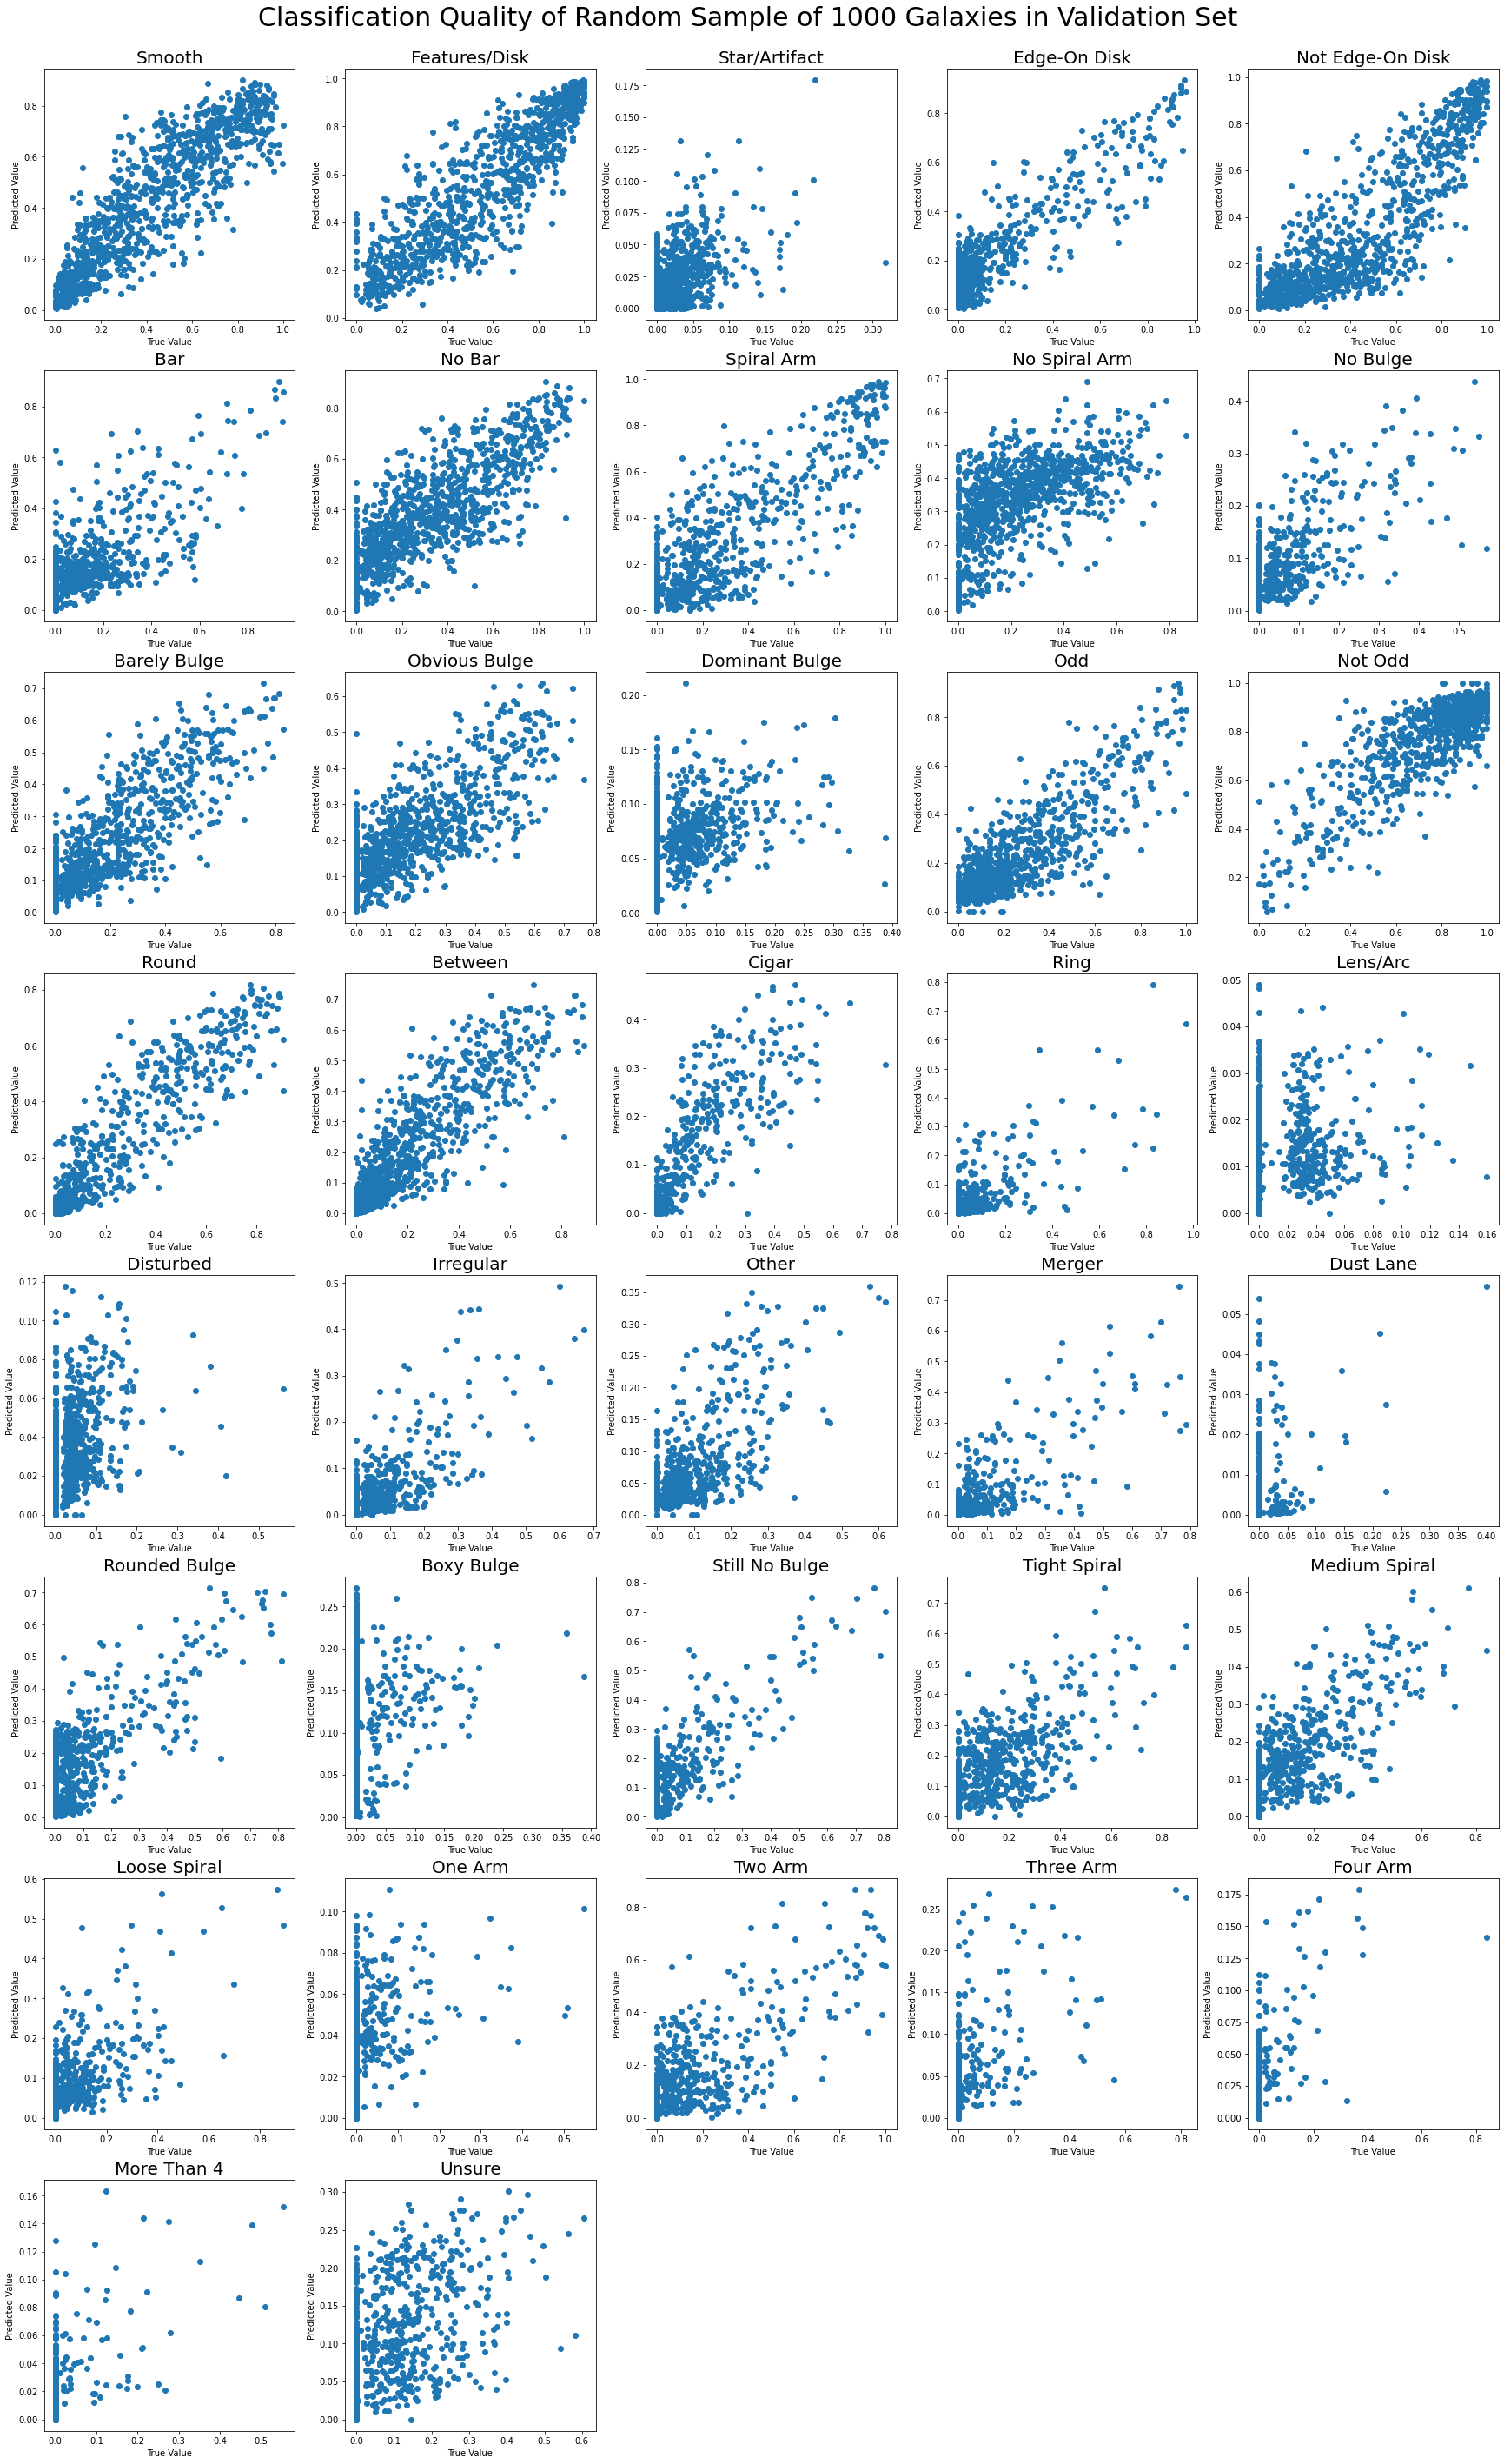

In [129]:
fig, ax = plt.subplots(8, 5, figsize = (30, 50))
for i, label in enumerate(cl_names[1:]):
    ax_i = ax[i // 5, i % 5]
    ax_i.scatter(y_true[:, i], y_pred[:, i], s = 3)
    ax_i.set_title(label, fontsize = 20)
    ax_i.set_xlabel("True Value")
    ax_i.set_ylabel("Predicted Value")
    
fig.delaxes(ax[7][2])
fig.delaxes(ax[7][3])
fig.delaxes(ax[7][4])

fig.suptitle("Classification Quality of Random Sample of 1000 Galaxies in Validation Set", fontsize = 30, y = 0.90)

plt.savefig(figure_dir + "classifications.png", bbox_inches = 'tight')

In [26]:
epsilon = 1e-12 # small constant to prevent division by 0

def rescale_ouputs(outputs):
    """
    normalise the answer groups for each question. That is 
    """
    from torch.autograd import Variable

    question_slices = [slice(0, 3), slice(3, 5), slice(5, 7), slice(7, 9), slice(9, 13), slice(13, 15),
                                slice(15, 18), slice(18, 25), slice(25, 28), slice(28, 31), slice(31, 37)]

    normalisation_mask = np.zeros((37, 37), dtype='float32')
    for s in question_slices:
        normalisation_mask[s, s] = 1.0
    
    normalisation_denoms = torch.matmul(outputs, torch.from_numpy(normalisation_mask)) + epsilon 
    output_normalised = outputs / normalisation_denoms

    # First element is a slice indicating the values to be scaled. Second element is an index indicating the scale factor.
    scaling_sequence = [
        (slice(3, 5), 1), #  rescale Q2 (edge on disk or not) by Class1.2 (features or disk)  
        (slice(5, 13), 4), # rescale Q3, Q4, Q5 (bar, spiral arms, bulge questions) by Class2.2 (not edge on disk)
        (slice(15, 18), 0),# rescale Q7 (how round?) by Class1.1 (is it smooth?)
        (slice(18, 25), 13),#rescale Q8 (how is it odd) by Class6.1 (is it odd?)
        (slice(25, 28), 3),# rescale Q9 (bulge?) by Class2.1 (edge-on-disk?)
        (slice(28, 37), 7),# rescale Q10, Q11 (spiral? how many arms) by Class4.1. (is there a spiral?)
    ]
    
    for probs_slice, scale_idx in scaling_sequence:
        output_normalised[:, probs_slice] = output_normalised[:, probs_slice].clone()* output_normalised[:, scale_idx].clone().reshape(-1,1)
    
    return output_normalised


In [32]:
from torchvision import datasets, models, transforms

In [33]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, str(galzoo.img_labels.iloc[idx, 0]) + ".jpg")
        print(img_path)
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


In [34]:
galzoo = CustomImageDataset("training_classifications.csv", "train_data/cropped_images/")

In [35]:
!ls train_data/cropped_images/132456.jpg

train_data/cropped_images/132456.jpg


In [37]:
import torchvision
torchvision.io.read_image("train_data/cropped_images/132456.jpg")

AttributeError: '_OpNamespace' object has no attribute 'read_file'

In [59]:
galzoo.__getitem__(2178)

train_data/cropped_images/132456.jpg


AttributeError: '_OpNamespace' object has no attribute 'read_file'

In [308]:
transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [224]:
net = models.resnet18(num_classes=37)


In [225]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [227]:
count_parameters(net)

11195493

In [228]:
crop_paths

array(['./train_data/cropped_images/873932.jpg',
       './train_data/cropped_images/523554.jpg',
       './train_data/cropped_images/139923.jpg', ...,
       './train_data/cropped_images/146136.jpg',
       './train_data/cropped_images/420736.jpg',
       './train_data/cropped_images/252845.jpg'], dtype='<U38')

In [307]:
net.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [226]:
def RMSELoss(output, targets):
    return torch.sqrt(torch.mean((output-targets)**2))

def RMSE(pred, truth):
    '''Non-tensor version of loss function'''
    return np.sqrt( np.mean( np.square( np.array(pred).flatten() - np.array(truth).flatten() )))


def get_output_width(width, kernel, padding, stride):
    '''helper function for building and combining layers'''
    return int((width + 2 * padding - kernel - 1) / stride + 1)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)



In [ ]:
# try resnet
from torchvision import datasets, models, transforms


train_again = True
import time


if not train_again:
    net = torch.load(data_dir + 'resnet_18.p')
else:
    net = models.resnet18(num_classes=37)
    print(count_parameters(net))

    
    start_time = time.time()
    optimizer = optim.Adam(net.parameters()) 
    scheduler = optim.lr_scheduler.StepLR(optimizer, 2, gamma=0.3)

    train_loss = []
    validation_loss = []
    batch_size = 128 
    mini_batch_size = 64 

    #
    # Loop through epochs
    #
    for epoch in range(1, 15): 
        batch_no = 1

        #
        # Test against some validation data (no training here)
        #
        datagen_test = batch_gen(num_imgs = 12316, is_train = False)
        pred = np.empty((0,len(classes)), float)
        count = 0
        
        # Loop through test images
        for images, targets, pics in datagen_test:
            count += 1
            
            # Predict for the test images.
            outputs = rescale_ouputs(torch.sigmoid(net(images)))
            pred = np.append(pred, outputs.detach().numpy(), axis=0)
            if count % 10 == 0: print(count)
            
        # Calculate loss metric for predictions. Save loss.
        val_loss = RMSE(y_val.to_numpy(), pred)
        validation_loss.append(val_loss)
        print('test loss: %.4f' % val_loss)

        #
        # Train.
        #
        datagen = batch_gen(is_train = True)
        
        for images, targets, _ in datagen: # read from storage
            
            # Loop through batches of images. 
            for mini_batch in range(int(batch_size/mini_batch_size)):
                
                # Load up images for this batch
                start = mini_batch*mini_batch_size
                if start >= images.shape[0]:
                    break
                finish = start + mini_batch_size
                
                # Zero out the gradients from previous rounds.
                optimizer.zero_grad()   
                
                # Rescale the NN-predicted outputs
                outputs = rescale_ouputs(torch.sigmoid(net(images[start:finish])))
                #outputs = net(images[start:finish])
                
                # Calculate the loss
                loss = RMSELoss(outputs, targets[start:finish])           

                # Back-progpogate the gradients
                loss.backward()
                
                # Step the optimizer and recalculate weights.
                optimizer.step()
            
            # Report the results and save them.
            display("Epoch %d, batch %d - loss: %.5f - time_sec %.1f" % (epoch, batch_no, loss.item(), (time.time()-start_time) ))

            batch_no += 1
            train_loss.append(loss.item())
            
        # Step the scheduler to adjust the learning rate.
        scheduler.step()
        
    # Save the final state of the neural net.
    torch.save(net, data_dir + 'resnet_18.p')
    
    # Save a record of the losses along the way.
    np.savez(data_dir + 'loss_history_resnet.npz', validation_loss = validation_loss, train_loss = train_loss)



In [298]:


def batch_gen(train_galaxies):
    yield 

In [299]:
len(rand_galaxies)

61578

In [300]:
len(train_galaxies)

49263

In [301]:
len(test_galaxies)

12315

In [302]:
test_galaxies

array([553402, 449744, 879640, ..., 942291, 856993, 430873])

In [305]:
train_labels.loc[train_galaxies]

GalaxyID    Smooth  Features/Disk  Star/Artifact  Edge-On Disk  \
GalaxyID                                                                   
556569      556569  0.147845       0.838105       0.014050      0.686861   
368831      368831  0.325380       0.646283       0.028337      0.049275   
577864      577864  0.000000       0.999354       0.000646      0.000000   
823070      823070  0.776000       0.145000       0.079000      0.000000   
174337      174337  0.677455       0.322545       0.000000      0.018651   
...            ...       ...            ...            ...           ...   
893172      893172  0.831716       0.081176       0.087108      0.000000   
657038      657038  0.209927       0.789672       0.000401      0.000000   
112843      112843  0.457719       0.525546       0.016735      0.000000   
333500      333500  0.343315       0.637737       0.018948      0.036959   
923951      923951  0.332828       0.667172       0.000000      0.030935   

          Not Edge-On Disk       Bar    No Bar  Spiral Arm  No Spiral Arm  \
GalaxyID                                                                    
556569            0.151244  0.000000  0.151244    0.000000       0.151244   
368831            0.597008  0.219799  0.377210    0.429407       0.167602   
577864            0.999354  0.408883  0.590471    0.999354       0.000000   
823070            0.145000  0.048285  0.096715    0.072500       0.072500   
174337            0.303894  0.099223  0.204671    0.000000       0.303894   
...                    ...       ...       ...         ...            ...   
893172            0.081176  0.052624  0.028552    0.000000       0.081176   
657038            0.789672  0.000000  0.789672    0.716147       0.073525   
112843            0.525546  0.000000  0.525546    0.210060       0.315486   
333500            0.600778  0.313792  0.286986    0.093276       0.507502   
923951            0.636237  0.000000  0.636237    0.169420       0.466817   

          ...  Still No Bulge  Tight Spiral  Medium Spiral  Loose Spiral  \
GalaxyID  ...                                                              
556569    ...        0.061638      0.000000       0.000000      0.000000   
368831    ...        0.000000      0.121344       0.164920      0.143143   
577864    ...        0.000000      0.134307       0.514811      0.350236   
823070    ...        0.000000      0.000000       0.048357      0.024143   
174337    ...        0.000000      0.000000       0.000000      0.000000   
...       ...             ...           ...            ...           ...   
893172    ...        0.000000      0.000000       0.000000      0.000000   
657038    ...        0.000000      0.502185       0.213962      0.000000   
112843    ...        0.000000      0.210060       0.000000      0.000000   
333500    ...        0.000000      0.027167       0.066109      0.000000   
923951    ...        0.000000      0.092838       0.039965      0.036618   

           One Arm   Two Arm  Three Arm  Four Arm  More Than 4    Unsure  
GalaxyID                                                                  
556569    0.000000  0.000000   0.000000       0.0      0.00000  0.000000  
368831    0.000000  0.429407   0.000000       0.0      0.00000  0.000000  
577864    0.000000  0.853276   0.146078       0.0      0.00000  0.000000  
823070    0.000000  0.048357   0.000000       0.0      0.00000  0.024143  
174337    0.000000  0.000000   0.000000       0.0      0.00000  0.000000  
...            ...       ...        ...       ...          ...       ...  
893172    0.000000  0.000000   0.000000       0.0      0.00000  0.000000  
657038    0.092198  0.277439   0.000000       0.0      0.00000  0.346510  
112843    0.000000  0.095836   0.000000       0.0      0.00000  0.114224  
333500    0.000000  0.039908   0.000000       0.0      0.00000  0.053368  
923951    0.020947  0.018553   0.000000       0.0      0.02097  0.108950  

[49263 rows x 38 columns]